**KaggleBusters — 2022 Kaggle Machine DS & ML Survey Analysis**


**Kaggle has been conducting industry-wide surveys since 2018 that present a comprehensive view of data science and machine learning.**

**The surveys contain raw data that covers a lot of subjects such as:**

   •	 **Which categories of computer vision methods do you use regularly?**
  
   •	 **What programming languages do you use regularly?**
  
   •	 **Which of the following integrated development environments (IDEs) do you use regularly? etc.** 

**in this competition, we will perform EDA on the data presented to us from 2018 -2022.**

**All the code and visualization files can be found on GitHub.**


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

import matplotlib.pyplot as plt
import seaborn as sns

**Let’s begin!**

**table of contents:**

•	Data preparation

•	Information about surveys participants

•	What is the most popular visualization library used by Kaggle participants over the years?

•	What is the most used programming language among the Kaggle survey participants?

•	What are the most used online platforms to learn data science from?

•	What are the most used IDEs among Kaggle survey participants?

•	What are the most used computer vision algorithms?

•	What are the most used NLP algorithms among Kaggle users?

•	What is the most popular ML algorithm amongst Kaggle users?


**The preparation**

in this section we will describe the data we were presented within the competition:

Questions from the 2022 survey were used as a base for a sub-sampled process from previous surveys. 
The columns represent answers to a given question from all the survey participants. a new CSV file was created to be further analyzed. 

As a result of an imbalanced number of samples over the surveys, we decided to visualize the answers as a ratio rather than the number of samples.


In [2]:
data2018 = pd.read_csv('/kaggle/input/2018-s/multipleChoiceResponses2018.csv')
data2019_multi =  pd.read_csv('/kaggle/input/2021-kaggle-data-science-machine-learning-survey/2019_kaggle_ds_and_ml_survey_responses_only.csv')
data2020 = pd.read_csv('/kaggle/input/2021-kaggle-data-science-machine-learning-survey/2020_kaggle_ds_and_ml_survey_responses_only.csv')
data2021 = pd.read_csv('/kaggle/input/2021-kaggle-data-science-machine-learning-survey/2021_kaggle_ds_and_ml_survey_responses_only.csv')
data2022 = pd.read_csv('/kaggle/input/kaggle-survey-2022/kaggle_survey_2022_responses.csv')



/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (0,3,7,19,34,47,49,50,51,52,53,54,68,81,94,96,109,115,130,139,147,154,167,180,193,206,219,232,245) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns

**Collecting data from surveys 2017 - 2022**


**Selected Columns from set of Data and Pre-processing**

In [3]:
def mergeLists(arr ,n1,n2,n3,n4,n5):

  return list(arr[0][n1]) + list(arr[1][n2]) + list(arr[2][n3]) + list(arr[3][n4]) + list(arr[4][n5])


In [4]:
arr = [data2018, data2019_multi,data2020,data2021,data2022]
df = pd.DataFrame(columns = ['duration', 'age', ])

#no value usage
data2021['empty'] = [-1 for i in range(len(data2021))]
data2020['empty'] = [-1 for i in range(len(data2020))]
data2022['empty'] = [-1 for i in range(len(data2022))]
data2018['empty'] = [-1 for i in range(len(data2018))]
data2019_multi['empty'] = [-1 for i in range(len(data2019_multi))]

data2022['year'] = 2022
data2021['year'] = 2021
data2020['year'] = 2020
data2019_multi['year'] = 2019
data2018['year'] = 2018

#C/C++
data2019_multi['Q18_Part_4'] = data2019_multi['Q18_Part_4'] + data2019_multi['Q18_Part_5']
data2020['Q7_Part_4'] = data2020['Q7_Part_4'] + data2020['Q7_Part_5']
data2021['Q7_Part_4'] = data2021['Q7_Part_4'] + data2021['Q7_Part_5']
data2022['Q12_4'] = data2022['Q12_4'] + data2022['Q12_5']


#duration = list(data2018['Time from Start to Finish (seconds)']) + list(data2019_multi['Duration (in seconds)']) + list(data2020['Time from Start to Finish (seconds)']) + list(data2021['Time from Start to Finish (seconds)']) + list(data2022['Duration (in seconds)'])

df['year'] = mergeLists(arr, 'year', 'year', 'year', 'year', 'year')
df['duration'] = mergeLists(arr, 'Time from Start to Finish (seconds)', 'Time from Start to Finish (seconds)' ,'Time from Start to Finish (seconds)', 'Time from Start to Finish (seconds)', 'Duration (in seconds)')
df['age'] = mergeLists(arr, 'Q2', 'Q1', 'Q1', 'Q1', 'Q2')
df['gender'] = mergeLists(arr, 'Q1', 'Q2', 'Q2', 'Q2', 'Q3')
df['country'] = mergeLists(arr, 'Q3', 'Q3', 'Q3', 'Q3', 'Q4')
df['formal_education'] = mergeLists(arr, 'Q4', 'Q4', 'Q4', 'Q4', 'Q8')
df['job_title'] = mergeLists(arr, 'Q6', 'Q5', 'Q5', 'Q5', 'Q23')
df['salary'] = mergeLists(arr, 'Q9', 'Q10', 'Q24', 'Q25', 'Q29')
#----------------- Company info ----------------------------------------------------------
# size
# data science workloads
# machine learning incorporate ---> classification model (?)
#  
#---------------- programming language --------------------------------------------------- (not null & not -1)
df['python'] = mergeLists(arr, 'Q16_Part_1', 'Q18_Part_1','Q7_Part_1','Q7_Part_1', 'Q12_1')
df['R'] = mergeLists(arr, 'Q16_Part_2', 'Q18_Part_2', 'Q7_Part_2', 'Q7_Part_2', 'Q12_2')
df['sql'] = mergeLists(arr, 'Q16_Part_3', 'Q18_Part_3', 'Q7_Part_3', 'Q7_Part_3', 'Q12_3')
df['C/C++'] = mergeLists(arr, 'Q16_Part_8', 'Q18_Part_4', 'Q7_Part_4', 'Q7_Part_4', 'Q12_4')
df['Java'] = mergeLists(arr, 'Q16_Part_5', 'Q18_Part_6', 'Q7_Part_6', 'Q7_Part_6', 'Q12_7')
df['JavaScript'] = mergeLists(arr, 'Q16_Part_6', 'Q18_Part_7', 'Q7_Part_7', 'Q7_Part_7', 'Q12_8')
df['Julia'] = mergeLists(arr, 'Q16_Part_11', 'empty', 'Q7_Part_8', 'Q7_Part_8', 'Q12_12')
df['MatlabCode'] = mergeLists(arr, 'empty', 'Q18_Part_10', 'Q7_Part_11', 'Q7_Part_11', 'Q12_11')
#---------------- Online platform for DS -------------------------------------------------- (not null & not -1)
df['coursera'] = mergeLists(arr, 'Q36_Part_2', 'Q13_Part_2', 'Q37_Part_1', 'Q40_Part_1', 'Q6_1')
df['udacity'] = mergeLists(arr, 'Q36_Part_1', 'Q13_Part_1', 'Q37_Part_6', 'Q40_Part_6', 'Q6_6')
df['udemy'] = mergeLists(arr, 'Q36_Part_9', 'Q13_Part_8', 'Q37_Part_7', 'Q40_Part_7', 'Q6_7')
df['kaggleLearn'] = mergeLists(arr, 'Q36_Part_6', 'Q13_Part_6', 'Q37_Part_3', 'Q40_Part_3', 'Q6_3')
df['edx'] = mergeLists(arr, 'Q36_Part_3', 'Q13_Part_3', 'Q37_Part_2', 'Q40_Part_2', 'Q6_2')
df['linkedinLearning'] = mergeLists(arr, 'empty', 'Q13_Part_9', 'Q37_Part_8', 'Q40_Part_8', 'Q6_8')
df['universityCourses'] = mergeLists(arr, 'Q36_Part_11', 'Q13_Part_10', 'Q37_Part_10', 'Q40_Part_10', 'Q6_10')
#-------------- IDE's --------------------------------------------------------------------- (not null & not -1)
df['jupyter'] = mergeLists(arr, 'Q13_Part_1', 'Q16_Part_1', 'Q9_Part_1', 'Q9_Part_1', 'Q13_1')
df['RStudio'] = mergeLists(arr, 'Q13_Part_2', 'Q16_Part_2', 'Q9_Part_2', 'Q9_Part_2', 'Q13_2')
df['Pycharm'] = mergeLists(arr, 'Q13_Part_3', 'Q16_Part_3', 'Q9_Part_5', 'Q9_Part_5', 'Q13_5')
df['visualStudio'] = mergeLists(arr, 'Q13_Part_8', 'Q16_Part_6', 'Q9_Part_3', 'Q9_Part_3', 'Q13_3')
df['spyder'] = mergeLists(arr, 'Q13_Part_13', 'Q16_Part_7', 'Q9_Part_6', 'Q9_Part_6', 'Q13_6')
df['matlab'] = mergeLists(arr, 'Q13_Part_7', 'Q16_Part_5', 'Q9_Part_10', 'Q9_Part_10', 'Q13_10')
df['vim/emacs'] = mergeLists(arr, 'Q13_Part_11', 'Q16_Part_8', 'Q9_Part_9', 'Q9_Part_9', 'Q13_9')
#-------------- Visualization packeges --------------------------------------------------------------------- (not null & not -1)
df['matplotlib'] = mergeLists(arr, 'Q21_Part_2', 'Q20_Part_2', 'Q14_Part_1', 'Q14_Part_1', 'Q15_1')
df['seaborn'] = mergeLists(arr, 'Q21_Part_8', 'Q20_Part_8', 'Q14_Part_2', 'Q14_Part_2', 'Q15_2')
df['plotly'] = mergeLists(arr, 'Q21_Part_6', 'Q20_Part_6', 'Q14_Part_3', 'Q14_Part_3', 'Q15_3')
df['altair'] = mergeLists(arr, 'Q21_Part_3', 'Q20_Part_3', 'Q14_Part_7', 'Q14_Part_7', 'Q15_7')
df['shiny'] = mergeLists(arr, 'Q21_Part_4', 'Q20_Part_4', 'Q14_Part_5', 'Q14_Part_5', 'Q15_5')
df['geoplotlib'] = mergeLists(arr, 'Q21_Part_9', 'Q20_Part_9', 'Q14_Part_9', 'Q14_Part_9', 'Q15_9')
#-------------- Machine learning frameworks (Q17) --------------------------------------------------------------------- (not null & not -1)
df['scikit-learn'] = mergeLists(arr, 'Q19_Part_1', 'Q28_Part_1', 'Q16_Part_1', 'Q16_Part_1', 'Q17_1')
df['tensor-flow'] = mergeLists(arr, 'Q19_Part_2', 'Q28_Part_2', 'Q16_Part_2', 'Q16_Part_2', 'Q17_2')
df['keras'] = mergeLists(arr, 'Q19_Part_3', 'Q28_Part_3', 'Q16_Part_3', 'Q16_Part_3', 'Q17_3')
df['pytorch'] = mergeLists(arr, 'Q19_Part_4', 'Q28_Part_6', 'Q16_Part_4', 'Q16_Part_4', 'Q17_4')
df['fastai'] = mergeLists(arr, 'Q19_Part_7', 'Q28_Part_10', 'Q16_Part_5', 'Q16_Part_5', 'Q17_5')
df['xgboost'] = mergeLists(arr, 'Q19_Part_10', 'Q28_Part_5', 'Q16_Part_7', 'Q16_Part_7', 'Q17_6')
#-------------- ML (Q17) --------------------------------------------------------------------- (not null & not -1)
df['linear'] = mergeLists(arr, 'empty', 'empty', 'empty', 'Q17_Part_1', 'Q18_1')
df['trees'] = mergeLists(arr, 'empty', 'empty', 'empty', 'Q17_Part_2', 'Q18_2')
df['GBM'] = mergeLists(arr, 'empty', 'empty', 'empty', 'Q17_Part_3', 'Q18_3')
df['bayesian'] = mergeLists(arr, 'empty', 'empty', 'empty', 'Q17_Part_4', 'Q18_4')
df['evolutionary'] = mergeLists(arr, 'empty', 'empty', 'empty', 'Q17_Part_5', 'Q18_5')
df['dnn'] = mergeLists(arr, 'empty', 'empty', 'empty', 'Q17_Part_6', 'Q18_6')
df['cnn'] = mergeLists(arr, 'empty', 'empty', 'empty', 'Q17_Part_7', 'Q18_7')
df['gan'] = mergeLists(arr, 'empty', 'empty', 'empty', 'Q17_Part_8', 'Q18_8')
df['rnn'] = mergeLists(arr, 'empty', 'empty', 'empty', 'Q17_Part_9', 'Q18_9')
df['transformer'] = mergeLists(arr, 'empty', 'empty', 'empty', 'Q17_Part_10', 'Q18_10')
#-------------- Computer Vision alghoritms (Q17) --------------------------------------------------------------------- (not null & not -1)
df['generalVideoTools'] = mergeLists(arr, 'empty', 'empty', 'empty', 'Q18_Part_1', 'Q19_1')
df['imageSegmentation'] = mergeLists(arr, 'empty', 'empty', 'empty', 'Q18_Part_2', 'Q19_2')
df['objectDetection'] = mergeLists(arr, 'empty', 'empty', 'empty', 'Q18_Part_3', 'Q19_3')
df['imageClassification'] = mergeLists(arr, 'empty', 'empty', 'empty', 'Q18_Part_4', 'Q19_4')
df['visionTransformers'] = mergeLists(arr, 'empty', 'empty', 'empty', 'Q18_Part_5', 'Q19_5')
df['generativeNetworks'] = mergeLists(arr, 'empty', 'empty', 'empty', 'Q18_Part_6', 'Q19_6')
#-------------- NLP (Q17) --------------------------------------------------------------------- (not null & not -1)
df['wordEmbeding'] = mergeLists(arr, 'empty', 'empty', 'empty', 'Q19_Part_1', 'Q20_1')
df['encoderDecoder'] = mergeLists(arr, 'empty', 'empty', 'empty', 'Q19_Part_2', 'Q20_2')
df['contextualizedEmbedding'] = mergeLists(arr, 'empty', 'empty', 'empty', 'Q19_Part_3', 'Q20_3')
df['transformerLanguage'] = mergeLists(arr, 'empty', 'empty', 'empty', 'Q19_Part_4', 'Q20_4')


In [5]:
df.head()

,duration,age,year,gender,country,formal_education,job_title,salary,python,R,...,generalVideoTools,imageSegmentation,objectDetection,imageClassification,visionTransformers,generativeNetworks,wordEmbeding,encoderDecoder,contextualizedEmbedding,transformerLanguage
0,Duration (in seconds),What is your age (# years)?,2018,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,What is your current yearly compensation (appr...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,710,45-49,2018,Female,United States of America,Doctoral degree,Consultant,NaN,NaN,NaN,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,434,30-34,2018,Male,Indonesia,Bachelor’s degree,Other,"10-20,000",NaN,NaN,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,718,30-34,2018,Female,United States of America,Master’s degree,Data Scientist,"0-10,000",NaN,R,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,621,35-39,2018,Male,United States of America,Master’s degree,Not employed,NaN,Python,R,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


**Exploratry Data Analysis**

In [33]:
def PL(data):

    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("Programming langauge popularity in top 2 most participated countries ")

    c_i = 0
    c_j = 0

    for i in data['country'].unique():

        new_d = pd.DataFrame(columns = ['x', 'y' , 'country'])

        d = data[data['country'] == i]
        x = ['python', 'R', 'sql', 'C/C++', 'Java', 'JavaScript', 'Julia', 'MatlabCode']
        y = [len(d[(d[p] != -1) & (d[p].isna() == False)]) for p in x]
        sns.barplot(ax = axes[c_i], x = x, y = y).set(title = f'{i}', xlabel = 'Langauge', ylabel = 'Count')
        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1
    plt.savefig('PL.png')

def IDE(data):

    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("IDE popularity in top 2 most participated countries ")

    c_i = 0
    c_j = 0

    for i in data['country'].unique():

        new_d = pd.DataFrame(columns = ['x', 'y' , 'country'])

        d = data[data['country'] == i]
        x = ['jupyter', 'RStudio', 'Pycharm', 'visualStudio', 'spyder', 'matlab', 'vim/emacs']
        y = [len(d[(d[p] != -1) & (d[p].isna() == False)]) for p in x]
        sns.barplot(ax = axes[c_i], x = x, y = y).set(title = f'{i}', xlabel = 'Langauge', ylabel = 'Count')
        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1
    plt.savefig('IDE.png')

def OP(data):

    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("Online platforms popularity in top 2 most participated countries ")

    c_i = 0
    c_j = 0

    for i in data['country'].unique():

        new_d = pd.DataFrame(columns = ['x', 'y' , 'country'])

        d = data[data['country'] == i]
        x = ['coursera', 'udacity', 'udemy', 'kaggleLearn', 'edx', 'linkedinLearning', 'universityCourses']
        x_to_p = ['coursera', 'udacity', 'udemy', 'kaggleLearn', 'edx', 'linkedin', 'university']
        y = [len(d[(d[p] != -1) & (d[p].isna() == False)]) for p in x]
        sns.barplot(ax = axes[c_i], x = x_to_p, y = y).set(title = f'{i}', xlabel = 'Langauge', ylabel = 'Count')
        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1
    plt.savefig('OP.png')

def VP(data):

    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("Visualization libraries popularity in top 2 most participated countries ")

    c_i = 0
    c_j = 0

    for i in data['country'].unique():

        new_d = pd.DataFrame(columns = ['x', 'y' , 'country'])

        d = data[data['country'] == i]
        x = ['matplotlib', 'seaborn', 'plotly', 'altair', 'shiny', 'geoplotlib']
        #x_to_p = ['coursera', 'udacity', 'udemy', 'kaggleLearn', 'edx', 'linkedin', 'university']
        y = [len(d[(d[p] != -1) & (d[p].isna() == False)]) for p in x]
        sns.barplot(ax = axes[c_i], x = x, y = y).set(title = f'{i}', xlabel = 'Langauge', ylabel = 'Count')
        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1
    plt.savefig('VP.png')

def ML(data):
    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("Machine learning algorithms popularity in top 2 most participated countries ")

    c_i = 0
    c_j = 0

    for i in data['country'].unique():

        new_d = pd.DataFrame(columns = ['x', 'y' , 'country'])

        d = data[data['country'] == i]
        x = ['linear', 'trees', 'GBM', 'bayesian', 'evolutionary', 'dnn', 'cnn', 'gan', 'rnn', 'transformer']
        #x_to_p = ['coursera', 'udacity', 'udemy', 'kaggleLearn', 'edx', 'linkedin', 'university']
        y = [len(d[(d[p] != -1) & (d[p].isna() == False)]) for p in x]
        sns.barplot(ax = axes[c_i], x = x, y = y).set(title = f'{i}', xlabel = 'Langauge', ylabel = 'Count')
        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1
    plt.savefig('ML.png')

def CV(data):
    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("CV algorithms popularity in top 2 most participated countries ")

    c_i = 0
    c_j = 0

    for i in data['country'].unique():

        new_d = pd.DataFrame(columns = ['x', 'y' , 'country'])

        d = data[data['country'] == i]
        x = ['generalVideoTools', 'imageSegmentation', 'objectDetection', 'imageClassification', 'visionTransformers', 'generativeNetworks']
        #x_to_p = ['coursera', 'udacity', 'udemy', 'kaggleLearn', 'edx', 'linkedin', 'university']
        y = [len(d[(d[p] != -1) & (d[p].isna() == False)]) for p in x]
        sns.barplot(ax = axes[c_i], x = x, y = y).set(title = f'{i}', xlabel = 'Langauge', ylabel = 'Count')
        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1
    plt.savefig('CV.png')

def NLP(data):
    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("NLP algorithm libraries popularity in top 2 most participated countries ")

    c_i = 0
    c_j = 0

    for i in data['country'].unique():

        new_d = pd.DataFrame(columns = ['x', 'y' , 'country'])

        d = data[data['country'] == i]
        x = ['wordEmbeding', 'encoderDecoder', 'contextualizedEmbedding', 'transformerLanguage']
        #x_to_p = ['coursera', 'udacity', 'udemy', 'kaggleLearn', 'edx', 'linkedin', 'university']
        y = [len(d[(d[p] != -1) & (d[p].isna() == False)]) for p in x]
        sns.barplot(ax = axes[c_i], x = x, y = y).set(title = f'{i}', xlabel = 'Langauge', ylabel = 'Count')
        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1
    plt.savefig('NLP.png')

#yearly

def YPL(data):

    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("Programming langauge popularity in top 2 most participated countries per year")

    y = []
    c_i = 0
    c_j = 0
    for i in data['country'].unique():

        d = data[data['country'] == i]
        years = [2018, 2019, 2020, 2021, 2022]
        x = ['python', 'R', 'sql', 'C/C++', 'Java', 'JavaScript', 'Julia', 'MatlabCode']


        normalizers = [len(d[(d['python'] != -1) & (d['python'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['R'] != -1) & (d['R'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['sql'] != -1) & (d['sql'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['C/C++'] != -1) & (d['C/C++'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['Java'] != -1) & (d['Java'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['JavaScript'] != -1) & (d['JavaScript'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['Julia'] != -1) & (d['Julia'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['MatlabCode'] != -1) & (d['MatlabCode'].isna() == False) & (d['year'] == ye)])
                       for ye in years]


        y_python = [len(d[(d['python'] != -1) & (d['python'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]
        y_r = [len(d[(d['R'] != -1) & (d['R'].isna() == False) & (d['year'] == ye)])/ normalizers[i] for i,ye in enumerate(years)]
        y_sql = [len(d[(d['sql'] != -1) & (d['sql'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]
        y_c = [len(d[(d['C/C++'] != -1) & (d['C/C++'].isna() == False) & (d['year'] == ye)])  / normalizers[i] for i,ye in enumerate(years)]
        y_java = [len(d[(d['Java'] != -1) & (d['Java'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]
        y_javascript = [len(d[(d['JavaScript'] != -1) & (d['JavaScript'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]
        y_julia = [len(d[(d['Julia'] != -1) & (d['Julia'].isna() == False) & (d['year'] == ye)])  / normalizers[i] for i,ye in enumerate(years)]
        y_matlabcode = [len(d[(d['MatlabCode'] != -1) & (d['MatlabCode'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]


        axes[c_i].plot(years, y_python, label = 'Python')
        axes[c_i].plot(years, y_r, label='R')
        axes[c_i].plot(years, y_sql, label = 'SQL')
        axes[c_i].plot(years, y_c, label='C')
        axes[c_i].plot( years, y_java, label = 'Java')
        axes[c_i].plot(years, y_javascript, label='Javascript')
        axes[c_i].plot(years, y_julia, label='Julia')
        axes[c_i].plot( years,  y_matlabcode, label = 'Matlab')
        axes[c_i].legend()
        axes[c_i].set_title(str(i))

        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1
    #plt.show()
    plt.savefig('YPL.png')

def YIDE(data):

    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("IDE popularity in top 2 most participated countries per year")

    y = []
    c_i = 0
    c_j = 0
    for i in data['country'].unique():

        d = data[data['country'] == i]
        years = [2018, 2019, 2020, 2021, 2022]
        x = ['jupyter', 'RStudio', 'Pycharm', 'visualStudio', 'spyder', 'matlab', 'vim/emacs']

        normalizers = [len(d[(d['jupyter'] != -1) & (d['jupyter'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['RStudio'] != -1) & (d['RStudio'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['Pycharm'] != -1) & (d['Pycharm'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['visualStudio'] != -1) & (d['visualStudio'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['spyder'] != -1) & (d['spyder'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['matlab'] != -1) & (d['matlab'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['vim/emacs'] != -1) & (d['vim/emacs'].isna() == False) & (d['year'] == ye)])
                       for ye in years]


        y_jupyter = [len(d[(d['jupyter'] != -1) & (d['jupyter'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]
        y_RStudio = [len(d[(d['RStudio'] != -1) & (d['RStudio'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]
        y_Pycharm = [len(d[(d['Pycharm'] != -1) & (d['Pycharm'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]
        y_visualStudio = [len(d[(d['visualStudio'] != -1) & (d['visualStudio'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]
        y_spyder = [len(d[(d['spyder'] != -1) & (d['spyder'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]
        y_matlab = [len(d[(d['matlab'] != -1) & (d['matlab'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]
        y_vimemacs = [len(d[(d['vim/emacs'] != -1) & (d['vim/emacs'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]

        axes[c_i].plot(years, y_jupyter, label = 'jupyter')
        axes[c_i].plot(years, y_RStudio, label='RStudio')
        axes[c_i].plot(years, y_Pycharm, label = 'Pycharm')
        axes[c_i].plot(years, y_visualStudio, label='visualStudio')
        axes[c_i].plot( years, y_spyder, label = 'Java')
        axes[c_i].plot(years, y_matlab, label='spyder')
        axes[c_i].plot( years, y_vimemacs, label = 'vim/emacs')

        axes[c_i].legend()
        axes[c_i].set_title(str(i))

        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1

    plt.savefig('YIDE.png')

def YOP(data):

    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("Online platforms popularity in top 2 most participated countries per year")

    y = []
    c_i = 0
    c_j = 0
    for i in data['country'].unique():

        d = data[data['country'] == i]
        years = [2018, 2019, 2020, 2021, 2022]
        x = ['coursera', 'udacity', 'udemy', 'kaggleLearn', 'edx', 'linkedinLearning', 'universityCourses']
        x_to_p = ['coursera', 'udacity', 'udemy', 'kaggleLearn', 'edx', 'linkedin', 'university']

        normalizers = [len(d[(d['coursera'] != -1) & (d['coursera'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['udacity'] != -1) & (d['udacity'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['udemy'] != -1) & (d['udemy'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['kaggleLearn'] != -1) & (d['kaggleLearn'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['edx'] != -1) & (d['edx'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['linkedinLearning'] != -1) & (d['linkedinLearning'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['universityCourses'] != -1) & (d['universityCourses'].isna() == False) & (d['year'] == ye)])
                       for ye in years]

        y_coursera = [len(d[(d['coursera'] != -1) & (d['coursera'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]
        y_udacity = [len(d[(d['udacity'] != -1) & (d['udacity'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]
        y_udemy = [len(d[(d['udemy'] != -1) & (d['udemy'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]
        y_kaggleLearn = [len(d[(d['kaggleLearn'] != -1) & (d['kaggleLearn'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]
        y_edx = [len(d[(d['edx'] != -1) & (d['edx'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]
        y_linkedinLearning = [len(d[(d['linkedinLearning'] != -1) & (d['linkedinLearning'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]
        y_universityCourses = [len(d[(d['universityCourses'] != -1) & (d['universityCourses'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]

        axes[c_i].plot(years, y_coursera, label = 'coursera')
        axes[c_i].plot(years, y_udacity, label='udacity')
        axes[c_i].plot(years, y_udemy, label = 'udemy')
        axes[c_i].plot(years, y_kaggleLearn, label='kaggleLearn')
        axes[c_i].plot( years, y_edx, label = 'edx')
        axes[c_i].plot(years, y_linkedinLearning, label='linkedinLearning')
        axes[c_i].plot( years, y_universityCourses, label = 'universityCourses')

        axes[c_i].legend()
        axes[c_i].set_title(str(i))

        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1

    plt.savefig('YOP.png')

def YVP(data):
    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("Visualization libraries popularity in top 2 most participated countries per year")

    y = []
    c_i = 0
    c_j = 0
    for i in data['country'].unique():

        d = data[data['country'] == i]
        years = [2018, 2019, 2020, 2021, 2022]
        x = ['matplotlib', 'seaborn', 'plotly', 'altair', 'shiny', 'geoplotlib']

        normalizers = [len(d[(d['matplotlib'] != -1) & (d['matplotlib'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['seaborn'] != -1) & (d['seaborn'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['plotly'] != -1) & (d['plotly'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['altair'] != -1) & (d['altair'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['shiny'] != -1) & (d['shiny'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['linkedinLearning'] != -1) & (d['linkedinLearning'].isna() == False) & (d['year'] == ye)])
                       for ye in years]


        y_matplotlib = [len(d[(d['matplotlib'] != -1) & (d['matplotlib'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]
        y_seaborn = [len(d[(d['seaborn'] != -1) & (d['seaborn'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]
        y_plotly = [len(d[(d['plotly'] != -1) & (d['plotly'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]
        y_altair = [len(d[(d['altair'] != -1) & (d['altair'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]
        y_shiny = [len(d[(d['shiny'] != -1) & (d['shiny'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]
        y_geoplotlib = [len(d[(d['linkedinLearning'] != -1) & (d['linkedinLearning'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]


        axes[c_i].plot(years, y_matplotlib, label = 'matplotlib')
        axes[c_i].plot(years, y_seaborn, label='seaborn')
        axes[c_i].plot(years, y_plotly, label = 'plotly')
        axes[c_i].plot(years, y_altair, label='altair')
        axes[c_i].plot( years, y_shiny, label = 'shiny')
        axes[c_i].plot(years, y_geoplotlib, label='geoplotlib')


        axes[c_i].legend()
        axes[c_i].set_title(str(i))

        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1

    plt.savefig('YVP.png')

def YML(data):
    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("Machine learning algorithms popularity in top 2 most participated countries per year")

    y = []
    c_i = 0
    c_j = 0
    for i in data['country'].unique():

        d = data[data['country'] == i]
        years = [2018, 2019, 2020, 2021, 2022]
        x = ['linear', 'trees', 'GBM', 'bayesian', 'evolutionary', 'dnn', 'cnn', 'gan', 'rnn', 'transformer']


        normalizers = [len(d[(d['linear'] != -1) & (d['linear'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['trees'] != -1) & (d['trees'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['GBM'] != -1) & (d['GBM'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['bayesian'] != -1) & (d['bayesian'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['evolutionary'] != -1) & (d['evolutionary'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['dnn'] != -1) & (d['dnn'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['cnn'] != -1) & (d['cnn'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['gan'] != -1) & (d['gan'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['rnn'] != -1) & (d['rnn'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['transformer'] != -1) & (d['transformer'].isna() == False) & (d['year'] == ye)])
                       for ye in years]


        y_python = [len(d[(d['linear'] != -1) & (d['linear'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_r = [len(d[(d['trees'] != -1) & (d['trees'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_sql = [len(d[(d['GBM'] != -1) & (d['GBM'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_c = [len(d[(d['bayesian'] != -1) & (d['bayesian'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_java = [len(d[(d['evolutionary'] != -1) & (d['evolutionary'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_javascript = [len(d[(d['dnn'] != -1) & (d['dnn'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_julia = [len(d[(d['cnn'] != -1) & (d['cnn'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_matlabcode = [len(d[(d['gan'] != -1) & (d['gan'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_rnn = [len(d[(d['rnn'] != -1) & (d['rnn'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_trans = [len(d[(d['transformer'] != -1) & (d['transformer'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]


        axes[c_i].plot(years, y_python, label = 'linear')
        axes[c_i].plot(years, y_r, label='trees')
        axes[c_i].plot(years, y_sql, label = 'GBM')
        axes[c_i].plot(years, y_c, label='bayesian')
        axes[c_i].plot( years, y_java, label = 'evolutionary')
        axes[c_i].plot(years, y_javascript, label='dnn')
        axes[c_i].plot( years, y_julia, label = 'cnn')
        axes[c_i].plot(years, y_matlabcode, label='gan')
        axes[c_i].plot( years,  y_rnn, label = 'rnn')
        axes[c_i].plot(years, y_trans, label='transformer')
        axes[c_i].legend()
        axes[c_i].set_title(str(i))

        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1

    plt.savefig('YML.png')

def YCV(data):

    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("CV algorithms popularity in top 2 most participated countries per year")

    y = []
    c_i = 0
    c_j = 0
    for i in data['country'].unique():

        d = data[data['country'] == i]
        years = [2018, 2019, 2020, 2021, 2022]
        x = ['generalVideoTools', 'imageSegmentation', 'objectDetection', 'imageClassification', 'visionTransformers', 'generativeNetworks']

        normalizers = [len(d[(d['generalVideoTools'] != -1) & (d['generalVideoTools'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['imageSegmentation'] != -1) & (d['imageSegmentation'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['objectDetection'] != -1) & (d['objectDetection'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['imageClassification'] != -1) & (d['imageClassification'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['visionTransformers'] != -1) & (d['visionTransformers'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['generativeNetworks'] != -1) & (d['generativeNetworks'].isna() == False) & (d['year'] == ye)])
                       for ye in years]

        y_matplotlib = [len(d[(d['generalVideoTools'] != -1) & (d['generalVideoTools'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_seaborn = [len(d[(d['imageSegmentation'] != -1) & (d['imageSegmentation'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_plotly = [len(d[(d['objectDetection'] != -1) & (d['objectDetection'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_altair = [len(d[(d['imageClassification'] != -1) & (d['imageClassification'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_shiny = [len(d[(d['visionTransformers'] != -1) & (d['visionTransformers'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_geoplotlib = [len(d[(d['generativeNetworks'] != -1) & (d['generativeNetworks'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]


        axes[c_i].plot(years, y_matplotlib, label = 'generalVideoTools')
        axes[c_i].plot(years, y_seaborn, label='imageSegmentation')
        axes[c_i].plot(years, y_plotly, label = 'objectDetection')
        axes[c_i].plot(years, y_altair, label='imageClassification')
        axes[c_i].plot( years, y_shiny, label = 'visionTransformers')
        axes[c_i].plot(years, y_geoplotlib, label='generativeNetworks')


        axes[c_i].legend()
        axes[c_i].set_title(str(i))

        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1

    plt.savefig('YCV.png')

def YNLP(data):
    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("NLP algorithms popularity in top 2 most participated countries per year")

    y = []
    c_i = 0
    c_j = 0
    for i in data['country'].unique():

        d = data[data['country'] == i]
        years = [2018, 2019, 2020, 2021, 2022]
        x = ['wordEmbeding', 'encoderDecoder', 'contextualizedEmbedding', 'transformerLanguage']


        normalizers = [len(d[(d['wordEmbeding'] != -1) & (d['wordEmbeding'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['encoderDecoder'] != -1) & (d['encoderDecoder'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['contextualizedEmbedding'] != -1) & (d['contextualizedEmbedding'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['transformerLanguage'] != -1) & (d['transformerLanguage'].isna() == False) & (d['year'] == ye)])
                       for ye in years]


        y_matplotlib = [len(d[(d['wordEmbeding'] != -1) & (d['wordEmbeding'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_seaborn = [len(d[(d['encoderDecoder'] != -1) & (d['encoderDecoder'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_plotly = [len(d[(d['contextualizedEmbedding'] != -1) & (d['contextualizedEmbedding'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_altair = [len(d[(d['transformerLanguage'] != -1) & (d['transformerLanguage'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]

        axes[c_i].plot(years, y_matplotlib, label = 'wordEmbeding')
        axes[c_i].plot(years, y_seaborn, label='encoderDecoder')
        axes[c_i].plot(years, y_plotly, label = 'contextualizedEmbedding')
        axes[c_i].plot(years, y_altair, label='transformerLanguage')

        axes[c_i].legend()
        axes[c_i].set_title(str(i))

        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1

    plt.savefig('YNLP.png')

#Male/Female

def MFPL(data):

    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("Programming langauge popularity among genders")

    c_i = 0
    c_j = 0

    for i in data['gender'].unique():

        new_d = pd.DataFrame(columns = ['x', 'y' , 'country'])

        d = data[data['gender'] == i]
        x = ['python', 'R', 'sql', 'C/C++', 'Java', 'JavaScript', 'Julia', 'MatlabCode']
        y = [len(d[(d[p] != -1) & (d[p].isna() == False)]) for p in x]
        sns.barplot(ax = axes[c_i], x = x, y = y).set(title = f'{i}', xlabel = 'Langauge', ylabel = 'Count')
        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1
    plt.savefig('MFPL.png')

def MFIDE(data):

    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("IDE popularity among genders ")

    c_i = 0
    c_j = 0

    for i in data['gender'].unique():

        new_d = pd.DataFrame(columns = ['x', 'y' , 'country'])

        d = data[data['gender'] == i]
        x = ['jupyter', 'RStudio', 'Pycharm', 'visualStudio', 'spyder', 'matlab', 'vim/emacs']
        y = [len(d[(d[p] != -1) & (d[p].isna() == False)]) for p in x]
        sns.barplot(ax = axes[c_i], x = x, y = y).set(title = f'{i}', xlabel = 'Langauge', ylabel = 'Count')
        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1
    plt.savefig('MFIDE.png')

def MFOP(data):

    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("Online platforms popularity among genders ")

    c_i = 0
    c_j = 0

    for i in data['gender'].unique():

        new_d = pd.DataFrame(columns = ['x', 'y' , 'country'])

        d = data[data['gender'] == i]
        x = ['coursera', 'udacity', 'udemy', 'kaggleLearn', 'edx', 'linkedinLearning', 'universityCourses']
        x_to_p = ['coursera', 'udacity', 'udemy', 'kaggleLearn', 'edx', 'linkedin', 'university']
        y = [len(d[(d[p] != -1) & (d[p].isna() == False)]) for p in x]
        sns.barplot(ax = axes[c_i], x = x_to_p, y = y).set(title = f'{i}', xlabel = 'Langauge', ylabel = 'Count')
        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1
    plt.savefig('MFOP.png')

def MFVP(data):

    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("Visualization libraries popularity among genders ")

    c_i = 0
    c_j = 0

    for i in data['gender'].unique():

        new_d = pd.DataFrame(columns = ['x', 'y' , 'country'])

        d = data[data['gender'] == i]
        x = ['matplotlib', 'seaborn', 'plotly', 'altair', 'shiny', 'geoplotlib']
        #x_to_p = ['coursera', 'udacity', 'udemy', 'kaggleLearn', 'edx', 'linkedin', 'university']
        y = [len(d[(d[p] != -1) & (d[p].isna() == False)]) for p in x]
        sns.barplot(ax = axes[c_i], x = x, y = y).set(title = f'{i}', xlabel = 'Langauge', ylabel = 'Count')
        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1
    plt.savefig('MFVP.png')

def MFML(data):
    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("Machine learning algorithms popularity among genders ")

    c_i = 0
    c_j = 0

    for i in data['gender'].unique():

        new_d = pd.DataFrame(columns = ['x', 'y' , 'country'])

        d = data[data['gender'] == i]
        x = ['linear', 'trees', 'GBM', 'bayesian', 'evolutionary', 'dnn', 'cnn', 'gan', 'rnn', 'transformer']
        #x_to_p = ['coursera', 'udacity', 'udemy', 'kaggleLearn', 'edx', 'linkedin', 'university']
        y = [len(d[(d[p] != -1) & (d[p].isna() == False)]) for p in x]
        sns.barplot(ax = axes[c_i], x = x, y = y).set(title = f'{i}', xlabel = 'Langauge', ylabel = 'Count')
        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1
    plt.savefig('MFML.png')

def MFCV(data):
    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("CV algorithms popularity among genders ")

    c_i = 0
    c_j = 0

    for i in data['gender'].unique():

        new_d = pd.DataFrame(columns = ['x', 'y' , 'country'])

        d = data[data['gender'] == i]
        x = ['generalVideoTools', 'imageSegmentation', 'objectDetection', 'imageClassification', 'visionTransformers', 'generativeNetworks']
        #x_to_p = ['coursera', 'udacity', 'udemy', 'kaggleLearn', 'edx', 'linkedin', 'university']
        y = [len(d[(d[p] != -1) & (d[p].isna() == False)]) for p in x]
        sns.barplot(ax = axes[c_i], x = x, y = y).set(title = f'{i}', xlabel = 'Langauge', ylabel = 'Count')
        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1
    plt.savefig('MFCV.png')

def MFNLP(data):

    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("NLP libraries popularity among genders")

    c_i = 0
    c_j = 0

    for i in data['gender'].unique():

        new_d = pd.DataFrame(columns = ['x', 'y' , 'country'])

        d = data[data['gender'] == i]
        x = ['generalVideoTools', 'imageSegmentation', 'objectDetection', 'imageClassification', 'visionTransformers', 'generativeNetworks']
        #x_to_p = ['coursera', 'udacity', 'udemy', 'kaggleLearn', 'edx', 'linkedin', 'university']
        y = [len(d[(d[p] != -1) & (d[p].isna() == False)]) for p in x]
        sns.barplot(ax = axes[c_i], x = x, y = y).set(title = f'{i}', xlabel = 'Langauge', ylabel = 'Count')
        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1
    plt.savefig('MFNLP.png')

#Male/Female yearly

def MFYPL(data):

    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("Programming langauge popularity among genders per year")

    y = []
    c_i = 0
    c_j = 0
    for i in data['gender'].unique():

        d = data[data['gender'] == i]
        years = [2018, 2019, 2020, 2021, 2022]
        x = ['python', 'R', 'sql', 'C/C++', 'Java', 'JavaScript', 'Julia', 'MatlabCode']

        normalizers = [len(d[(d['python'] != -1) & (d['python'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['R'] != -1) & (d['R'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['sql'] != -1) & (d['sql'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['C/C++'] != -1) & (d['C/C++'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['Java'] != -1) & (d['Java'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['JavaScript'] != -1) & (d['JavaScript'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['Julia'] != -1) & (d['Julia'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['MatlabCode'] != -1) & (d['MatlabCode'].isna() == False) & (d['year'] == ye)])
                       for ye in years]


        y_python = [len(d[(d['python'] != -1) & (d['python'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]
        y_r = [len(d[(d['R'] != -1) & (d['R'].isna() == False) & (d['year'] == ye)])/ normalizers[i] for i,ye in enumerate(years)]
        y_sql = [len(d[(d['sql'] != -1) & (d['sql'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]
        y_c = [len(d[(d['C/C++'] != -1) & (d['C/C++'].isna() == False) & (d['year'] == ye)])  / normalizers[i] for i,ye in enumerate(years)]
        y_java = [len(d[(d['Java'] != -1) & (d['Java'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]
        y_javascript = [len(d[(d['JavaScript'] != -1) & (d['JavaScript'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]
        y_julia = [len(d[(d['Julia'] != -1) & (d['Julia'].isna() == False) & (d['year'] == ye)])  / normalizers[i] for i,ye in enumerate(years)]
        y_matlabcode = [len(d[(d['MatlabCode'] != -1) & (d['MatlabCode'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]


        axes[c_i].plot(years, y_python, label = 'Python')
        axes[c_i].plot(years, y_r, label='R')
        axes[c_i].plot(years, y_sql, label = 'SQL')
        axes[c_i].plot(years, y_c, label='C')
        axes[c_i].plot( years, y_java, label = 'Java')
        axes[c_i].plot(years, y_javascript, label='Javascript')
        axes[c_i].plot( years, y_python, label = 'Python')
        axes[c_i].plot(years, y_julia, label='Julia')
        axes[c_i].plot( years,  y_matlabcode, label = 'Matlab')
        axes[c_i].legend()
        axes[c_i].set_title(str(i))

        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1

    plt.savefig('MFYPL.png')

def MFYIDE(data):

    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("IDE popularity among genders per year")

    y = []
    c_i = 0
    c_j = 0
    for i in data['gender'].unique():

        d = data[data['gender'] == i]
        years = [2018, 2019, 2020, 2021, 2022]
        x = ['jupyter', 'RStudio', 'Pycharm', 'visualStudio', 'spyder', 'matlab', 'vim/emacs']

        normalizers = [len(d[(d['jupyter'] != -1) & (d['jupyter'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['RStudio'] != -1) & (d['RStudio'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['Pycharm'] != -1) & (d['Pycharm'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['visualStudio'] != -1) & (d['visualStudio'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['spyder'] != -1) & (d['spyder'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['matlab'] != -1) & (d['matlab'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['vim/emacs'] != -1) & (d['vim/emacs'].isna() == False) & (d['year'] == ye)])
                       for ye in years]

        y_jupyter = [len(d[(d['jupyter'] != -1) & (d['jupyter'].isna() == False) & (d['year'] == ye)]) / normalizers[i]
                     for i, ye in enumerate(years)]
        y_RStudio = [len(d[(d['RStudio'] != -1) & (d['RStudio'].isna() == False) & (d['year'] == ye)]) / normalizers[i]
                     for i, ye in enumerate(years)]
        y_Pycharm = [len(d[(d['Pycharm'] != -1) & (d['Pycharm'].isna() == False) & (d['year'] == ye)]) / normalizers[i]
                     for i, ye in enumerate(years)]
        y_visualStudio = [
            len(d[(d['visualStudio'] != -1) & (d['visualStudio'].isna() == False) & (d['year'] == ye)]) / normalizers[i]
            for i, ye in enumerate(years)]
        y_spyder = [len(d[(d['spyder'] != -1) & (d['spyder'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for
                    i, ye in enumerate(years)]
        y_matlab = [len(d[(d['matlab'] != -1) & (d['matlab'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for
                    i, ye in enumerate(years)]
        y_vimemacs = [
            len(d[(d['vim/emacs'] != -1) & (d['vim/emacs'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for
            i, ye in enumerate(years)]

        axes[c_i].plot(years, y_jupyter, label = 'jupyter')
        axes[c_i].plot(years, y_RStudio, label='RStudio')
        axes[c_i].plot(years, y_Pycharm, label = 'Pycharm')
        axes[c_i].plot(years, y_visualStudio, label='visualStudio')
        axes[c_i].plot( years, y_spyder, label = 'Java')
        axes[c_i].plot(years, y_matlab, label='spyder')
        axes[c_i].plot( years, y_vimemacs, label = 'vim/emacs')

        axes[c_i].legend()
        axes[c_i].set_title(str(i))

        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1

    plt.savefig('MFYIDE.png')

def MFYOP(data):

    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("Online platforms popularity among genders per year")

    y = []
    c_i = 0
    c_j = 0
    for i in data['gender'].unique():

        d = data[data['gender'] == i]
        years = [2018, 2019, 2020, 2021, 2022]
        x = ['coursera', 'udacity', 'udemy', 'kaggleLearn', 'edx', 'linkedinLearning', 'universityCourses']
        x_to_p = ['coursera', 'udacity', 'udemy', 'kaggleLearn', 'edx', 'linkedin', 'university']

        normalizers = [len(d[(d['coursera'] != -1) & (d['coursera'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['udacity'] != -1) & (d['udacity'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['udemy'] != -1) & (d['udemy'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['kaggleLearn'] != -1) & (d['kaggleLearn'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['edx'] != -1) & (d['edx'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['linkedinLearning'] != -1) & (d['linkedinLearning'].isna() == False) & (
                                   d['year'] == ye)]) +
                       len(d[(d['universityCourses'] != -1) & (d['universityCourses'].isna() == False) & (
                                   d['year'] == ye)])
                       for ye in years]

        y_coursera = [
            len(d[(d['coursera'] != -1) & (d['coursera'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for
            i, ye in enumerate(years)]
        y_udacity = [len(d[(d['udacity'] != -1) & (d['udacity'].isna() == False) & (d['year'] == ye)]) / normalizers[i]
                     for i, ye in enumerate(years)]
        y_udemy = [len(d[(d['udemy'] != -1) & (d['udemy'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for
                   i, ye in enumerate(years)]
        y_kaggleLearn = [
            len(d[(d['kaggleLearn'] != -1) & (d['kaggleLearn'].isna() == False) & (d['year'] == ye)]) / normalizers[i]
            for i, ye in enumerate(years)]
        y_edx = [len(d[(d['edx'] != -1) & (d['edx'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i, ye in
                 enumerate(years)]
        y_linkedinLearning = [
            len(d[(d['linkedinLearning'] != -1) & (d['linkedinLearning'].isna() == False) & (d['year'] == ye)]) /
            normalizers[i] for i, ye in enumerate(years)]
        y_universityCourses = [
            len(d[(d['universityCourses'] != -1) & (d['universityCourses'].isna() == False) & (d['year'] == ye)]) /
            normalizers[i] for i, ye in enumerate(years)]

        axes[c_i].plot(years, y_coursera, label = 'coursera')
        axes[c_i].plot(years, y_udacity, label='udacity')
        axes[c_i].plot(years, y_udemy, label = 'udemy')
        axes[c_i].plot(years, y_kaggleLearn, label='kaggleLearn')
        axes[c_i].plot( years, y_edx, label = 'edx')
        axes[c_i].plot(years, y_linkedinLearning, label='linkedinLearning')
        axes[c_i].plot( years, y_universityCourses, label = 'universityCourses')

        axes[c_i].legend()
        axes[c_i].set_title(str(i))

        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1

    plt.savefig('MFYOP.png')

def MFYVP(data):
    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("Visualization libraries popularity among genders per year")

    y = []
    c_i = 0
    c_j = 0
    for i in data['gender'].unique():

        d = data[data['gender'] == i]
        years = [2018, 2019, 2020, 2021, 2022]
        x = ['matplotlib', 'seaborn', 'plotly', 'altair', 'shiny', 'geoplotlib']

        normalizers = [len(d[(d['matplotlib'] != -1) & (d['matplotlib'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['seaborn'] != -1) & (d['seaborn'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['plotly'] != -1) & (d['plotly'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['altair'] != -1) & (d['altair'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['shiny'] != -1) & (d['shiny'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['linkedinLearning'] != -1) & (d['linkedinLearning'].isna() == False) & (d['year'] == ye)])
                       for ye in years]


        y_matplotlib = [len(d[(d['matplotlib'] != -1) & (d['matplotlib'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]
        y_seaborn = [len(d[(d['seaborn'] != -1) & (d['seaborn'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]
        y_plotly = [len(d[(d['plotly'] != -1) & (d['plotly'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]
        y_altair = [len(d[(d['altair'] != -1) & (d['altair'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]
        y_shiny = [len(d[(d['shiny'] != -1) & (d['shiny'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]
        y_geoplotlib = [len(d[(d['linkedinLearning'] != -1) & (d['linkedinLearning'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]


        axes[c_i].plot(years, y_matplotlib, label = 'matplotlib')
        axes[c_i].plot(years, y_seaborn, label='seaborn')
        axes[c_i].plot(years, y_plotly, label = 'plotly')
        axes[c_i].plot(years, y_altair, label='altair')
        axes[c_i].plot( years, y_shiny, label = 'shiny')
        axes[c_i].plot(years, y_geoplotlib, label='geoplotlib')


        axes[c_i].legend()
        axes[c_i].set_title(str(i))

        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1

    plt.savefig('MFYVP.png')

def MFYML(data):
    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("Machine learning algorithms popularity per year")

    y = []
    c_i = 0
    c_j = 0
    for i in data['gender'].unique():

        d = data[data['gender'] == i]
        years = [2018, 2019, 2020, 2021, 2022]
        x = ['linear', 'trees', 'GBM', 'bayesian', 'evolutionary', 'dnn', 'cnn', 'gan', 'rnn', 'transformer']

        normalizers = [len(d[(d['linear'] != -1) & (d['linear'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['trees'] != -1) & (d['trees'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['GBM'] != -1) & (d['GBM'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['bayesian'] != -1) & (d['bayesian'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['evolutionary'] != -1) & (d['evolutionary'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['dnn'] != -1) & (d['dnn'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['cnn'] != -1) & (d['cnn'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['gan'] != -1) & (d['gan'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['rnn'] != -1) & (d['rnn'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['transformer'] != -1) & (d['transformer'].isna() == False) & (d['year'] == ye)])
                       for ye in years]

        y_python = [len(d[(d['linear'] != -1) & (d['linear'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_r = [len(d[(d['trees'] != -1) & (d['trees'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_sql = [len(d[(d['GBM'] != -1) & (d['GBM'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_c = [len(d[(d['bayesian'] != -1) & (d['bayesian'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_java = [
            len(d[(d['evolutionary'] != -1) & (d['evolutionary'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_javascript = [len(d[(d['dnn'] != -1) & (d['dnn'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_julia = [len(d[(d['cnn'] != -1) & (d['cnn'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_matlabcode = [len(d[(d['gan'] != -1) & (d['gan'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_rnn = [len(d[(d['rnn'] != -1) & (d['rnn'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_trans = [
            len(d[(d['transformer'] != -1) & (d['transformer'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]


        axes[c_i].plot(years, y_python, label = 'linear')
        axes[c_i].plot(years, y_r, label='trees')
        axes[c_i].plot(years, y_sql, label = 'GBM')
        axes[c_i].plot(years, y_c, label='bayesian')
        axes[c_i].plot( years, y_java, label = 'evolutionary')
        axes[c_i].plot(years, y_javascript, label='dnn')
        axes[c_i].plot( years, y_julia, label = 'cnn')
        axes[c_i].plot(years, y_matlabcode, label='gan')
        axes[c_i].plot( years,  y_rnn, label = 'rnn')
        axes[c_i].plot(years, y_trans, label='transformer')
        axes[c_i].legend()
        axes[c_i].set_title(str(i))

        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1

    plt.savefig('MFYML.png')

def MFYCV(data):
    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("CV algorithms popularity among genders per year")

    y = []
    c_i = 0
    c_j = 0
    for i in data['gender'].unique():

        d = data[data['gender'] == i]
        years = [2018, 2019, 2020, 2021, 2022]
        x = ['generalVideoTools', 'imageSegmentation', 'objectDetection', 'imageClassification', 'visionTransformers', 'generativeNetworks']

        normalizers = [len(d[(d['generalVideoTools'] != -1) & (d['generalVideoTools'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['imageSegmentation'] != -1) & (d['imageSegmentation'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['objectDetection'] != -1) & (d['objectDetection'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['imageClassification'] != -1) & (d['imageClassification'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['visionTransformers'] != -1) & (d['visionTransformers'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['generativeNetworks'] != -1) & (d['generativeNetworks'].isna() == False) & (d['year'] == ye)])
                       for ye in years]

        y_matplotlib = [len(d[(d['generalVideoTools'] != -1) & (d['generalVideoTools'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_seaborn = [len(d[(d['imageSegmentation'] != -1) & (d['imageSegmentation'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_plotly = [len(d[(d['objectDetection'] != -1) & (d['objectDetection'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_altair = [len(d[(d['imageClassification'] != -1) & (d['imageClassification'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_shiny = [len(d[(d['visionTransformers'] != -1) & (d['visionTransformers'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_geoplotlib = [len(d[(d['generativeNetworks'] != -1) & (d['generativeNetworks'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]

        axes[c_i].plot(years, y_matplotlib, label = 'generalVideoTools')
        axes[c_i].plot(years, y_seaborn, label='imageSegmentation')
        axes[c_i].plot(years, y_plotly, label = 'objectDetection')
        axes[c_i].plot(years, y_altair, label='imageClassification')
        axes[c_i].plot( years, y_shiny, label = 'visionTransformers')
        axes[c_i].plot(years, y_geoplotlib, label='generativeNetworks')


        axes[c_i].legend()
        axes[c_i].set_title(str(i))

        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1

    plt.savefig('MFYCV.png')

def MFYNLP(data):
    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("NLP algorithms popularity among genders per year")

    y = []
    c_i = 0
    c_j = 0
    for i in data['gender'].unique():

        d = data[data['gender'] == i]
        years = [2018, 2019, 2020, 2021, 2022]
        x = ['wordEmbeding', 'encoderDecoder', 'contextualizedEmbedding', 'transformerLanguage']
        normalizers = [len(d[(d['wordEmbeding'] != -1) & (d['wordEmbeding'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['encoderDecoder'] != -1) & (d['encoderDecoder'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['contextualizedEmbedding'] != -1) & (d['contextualizedEmbedding'].isna() == False) & (
                                   d['year'] == ye)]) +
                       len(d[(d['transformerLanguage'] != -1) & (d['transformerLanguage'].isna() == False) & (
                                   d['year'] == ye)])
                       for ye in years]

        y_matplotlib = [
            len(d[(d['wordEmbeding'] != -1) & (d['wordEmbeding'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_seaborn = [len(d[(d['encoderDecoder'] != -1) & (d['encoderDecoder'].isna() == False) & (d['year'] == ye)]) /
                     max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_plotly = [len(d[(d['contextualizedEmbedding'] != -1) & (d['contextualizedEmbedding'].isna() == False) & (
                    d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_altair = [
            len(d[(d['transformerLanguage'] != -1) & (d['transformerLanguage'].isna() == False) & (d['year'] == ye)]) /
            max(1,normalizers[i]) for i,ye in enumerate(years)]

        axes[c_i].plot(years, y_matplotlib, label = 'wordEmbeding')
        axes[c_i].plot(years, y_seaborn, label='encoderDecoder')
        axes[c_i].plot(years, y_plotly, label = 'contextualizedEmbedding')
        axes[c_i].plot(years, y_altair, label='transformerLanguage')

        axes[c_i].legend()
        axes[c_i].set_title(str(i))

        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1

    plt.savefig('MFYNLP.png')

#title

def TPL(data):

    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("Programming langauge popularity")

    c_i = 0
    c_j = 0

    for i in data['job_title'].unique():

        new_d = pd.DataFrame(columns = ['x', 'y' , 'country'])

        d = data[data['job_title'] == i]
        x = ['python', 'R', 'sql', 'C/C++', 'Java', 'JavaScript', 'Julia', 'MatlabCode']
        y = [len(d[(d[p] != -1) & (d[p].isna() == False)]) for p in x]
        sns.barplot(ax = axes[c_i], x = x, y = y).set(title = f'{i}', xlabel = 'Langauge', ylabel = 'Count')
        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1

    plt.savefig('TPL.png')

def TIDE(data):

    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("IDE popularity")

    c_i = 0
    c_j = 0

    for i in data['job_title'].unique():

        new_d = pd.DataFrame(columns = ['x', 'y' , 'country'])

        d = data[data['job_title'] == i]
        x = ['jupyter', 'RStudio', 'Pycharm', 'visualStudio', 'spyder', 'matlab', 'vim/emacs']
        y = [len(d[(d[p] != -1) & (d[p].isna() == False)]) for p in x]
        sns.barplot(ax = axes[c_i], x = x, y = y).set(title = f'{i}', xlabel = 'Langauge', ylabel = 'Count')
        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1
    plt.savefig('TIDE.png')

def TOP(data):

    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("Online platforms popularity")

    c_i = 0
    c_j = 0

    for i in data['job_title'].unique():

        new_d = pd.DataFrame(columns = ['x', 'y' , 'country'])

        d = data[data['job_title'] == i]
        x = ['coursera', 'udacity', 'udemy', 'kaggleLearn', 'edx', 'linkedinLearning', 'universityCourses']
        x_to_p = ['coursera', 'udacity', 'udemy', 'kaggleLearn', 'edx', 'linkedin', 'university']
        y = [len(d[(d[p] != -1) & (d[p].isna() == False)]) for p in x]
        sns.barplot(ax = axes[c_i], x = x_to_p, y = y).set(title = f'{i}', xlabel = 'Langauge', ylabel = 'Count')
        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1
    plt.savefig('TOP.png')

def TVP(data):

    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("Visualization libraries popularity")

    c_i = 0
    c_j = 0

    for i in data['job_title'].unique():

        new_d = pd.DataFrame(columns = ['x', 'y' , 'country'])

        d = data[data['job_title'] == i]
        x = ['matplotlib', 'seaborn', 'plotly', 'altair', 'shiny', 'geoplotlib']
        #x_to_p = ['coursera', 'udacity', 'udemy', 'kaggleLearn', 'edx', 'linkedin', 'university']
        y = [len(d[(d[p] != -1) & (d[p].isna() == False)]) for p in x]
        sns.barplot(ax = axes[c_i], x = x, y = y).set(title = f'{i}', xlabel = 'Langauge', ylabel = 'Count')
        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1
    plt.savefig('TVP.png')

def TML(data):
    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("Machine learning algorithms popularity")

    c_i = 0
    c_j = 0

    for i in data['job_title'].unique():

        new_d = pd.DataFrame(columns = ['x', 'y' , 'country'])

        d = data[data['job_title'] == i]
        x = ['linear', 'trees', 'GBM', 'bayesian', 'evolutionary', 'dnn', 'cnn', 'gan', 'rnn', 'transformer']
        #x_to_p = ['coursera', 'udacity', 'udemy', 'kaggleLearn', 'edx', 'linkedin', 'university']
        y = [len(d[(d[p] != -1) & (d[p].isna() == False)]) for p in x]
        sns.barplot(ax = axes[c_i], x = x, y = y).set(title = f'{i}', xlabel = 'Langauge', ylabel = 'Count')
        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1
    plt.savefig('TML.png')

def TCV(data):
    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("CV algorithms popularity")

    c_i = 0
    c_j = 0

    for i in data['job_title'].unique():

        new_d = pd.DataFrame(columns = ['x', 'y' , 'country'])

        d = data[data['job_title'] == i]
        x = ['generalVideoTools', 'imageSegmentation', 'objectDetection', 'imageClassification', 'visionTransformers', 'generativeNetworks']
        #x_to_p = ['coursera', 'udacity', 'udemy', 'kaggleLearn', 'edx', 'linkedin', 'university']
        y = [len(d[(d[p] != -1) & (d[p].isna() == False)]) for p in x]
        sns.barplot(ax = axes[c_i], x = x, y = y).set(title = f'{i}', xlabel = 'Langauge', ylabel = 'Count')
        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1
    plt.savefig('TCV.png')

def TNLP(data):
    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("NLP algorithm libraries popularity")

    c_i = 0
    c_j = 0

    for i in data['job_title'].unique():

        new_d = pd.DataFrame(columns = ['x', 'y' , 'country'])

        d = data[data['job_title'] == i]
        x = ['wordEmbeding', 'encoderDecoder', 'contextualizedEmbedding', 'transformerLanguage']
        #x_to_p = ['coursera', 'udacity', 'udemy', 'kaggleLearn', 'edx', 'linkedin', 'university']
        y = [len(d[(d[p] != -1) & (d[p].isna() == False)]) for p in x]
        sns.barplot(ax = axes[c_i], x = x, y = y).set(title = f'{i}', xlabel = 'Langauge', ylabel = 'Count')
        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1
    plt.savefig('TNLP.png')

#yearly

def TYPL(data):

    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("Programming langauge popularity")

    y = []
    c_i = 0
    c_j = 0
    for i in data['job_title'].unique():

        d = data[data['job_title'] == i]
        years = [2018, 2019, 2020, 2021, 2022]
        x = ['python', 'R', 'sql', 'C/C++', 'Java', 'JavaScript', 'Julia', 'MatlabCode']

        normalizers = [len(d[(d['python'] != -1) & (d['python'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['R'] != -1) & (d['R'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['sql'] != -1) & (d['sql'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['C/C++'] != -1) & (d['C/C++'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['Java'] != -1) & (d['Java'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['JavaScript'] != -1) & (d['JavaScript'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['Julia'] != -1) & (d['Julia'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['MatlabCode'] != -1) & (d['MatlabCode'].isna() == False) & (d['year'] == ye)])
                       for ye in years]


        y_python = [len(d[(d['python'] != -1) & (d['python'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]
        y_r = [len(d[(d['R'] != -1) & (d['R'].isna() == False) & (d['year'] == ye)])/ normalizers[i] for i,ye in enumerate(years)]
        y_sql = [len(d[(d['sql'] != -1) & (d['sql'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]
        y_c = [len(d[(d['C/C++'] != -1) & (d['C/C++'].isna() == False) & (d['year'] == ye)])  / normalizers[i] for i,ye in enumerate(years)]
        y_java = [len(d[(d['Java'] != -1) & (d['Java'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]
        y_javascript = [len(d[(d['JavaScript'] != -1) & (d['JavaScript'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]
        y_julia = [len(d[(d['Julia'] != -1) & (d['Julia'].isna() == False) & (d['year'] == ye)])  / normalizers[i] for i,ye in enumerate(years)]
        y_matlabcode = [len(d[(d['MatlabCode'] != -1) & (d['MatlabCode'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]


        axes[c_i].plot(years, y_python, label = 'Python')
        axes[c_i].plot(years, y_r, label='R')
        axes[c_i].plot(years, y_sql, label = 'SQL')
        axes[c_i].plot(years, y_c, label='C')
        axes[c_i].plot( years, y_java, label = 'Java')
        axes[c_i].plot(years, y_javascript, label='Javascript')
        axes[c_i].plot(years, y_julia, label='Julia')
        axes[c_i].plot( years,  y_matlabcode, label = 'Matlab')
        axes[c_i].legend()
        axes[c_i].set_title(str(i))

        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1

    plt.savefig('TYPL.png')

def TYIDE(data):

    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("IDE popularity")

    y = []
    c_i = 0
    c_j = 0
    for i in data['job_title'].unique():

        d = data[data['job_title'] == i]
        years = [2018, 2019, 2020, 2021, 2022]
        x = ['jupyter', 'RStudio', 'Pycharm', 'visualStudio', 'spyder', 'matlab', 'vim/emacs']

        normalizers = [len(d[(d['jupyter'] != -1) & (d['jupyter'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['RStudio'] != -1) & (d['RStudio'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['Pycharm'] != -1) & (d['Pycharm'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['visualStudio'] != -1) & (d['visualStudio'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['spyder'] != -1) & (d['spyder'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['matlab'] != -1) & (d['matlab'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['vim/emacs'] != -1) & (d['vim/emacs'].isna() == False) & (d['year'] == ye)])
                       for ye in years]

        y_jupyter = [len(d[(d['jupyter'] != -1) & (d['jupyter'].isna() == False) & (d['year'] == ye)]) / normalizers[i]
                     for i, ye in enumerate(years)]
        y_RStudio = [len(d[(d['RStudio'] != -1) & (d['RStudio'].isna() == False) & (d['year'] == ye)]) / normalizers[i]
                     for i, ye in enumerate(years)]
        y_Pycharm = [len(d[(d['Pycharm'] != -1) & (d['Pycharm'].isna() == False) & (d['year'] == ye)]) / normalizers[i]
                     for i, ye in enumerate(years)]
        y_visualStudio = [
            len(d[(d['visualStudio'] != -1) & (d['visualStudio'].isna() == False) & (d['year'] == ye)]) / normalizers[i]
            for i, ye in enumerate(years)]
        y_spyder = [len(d[(d['spyder'] != -1) & (d['spyder'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for
                    i, ye in enumerate(years)]
        y_matlab = [len(d[(d['matlab'] != -1) & (d['matlab'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for
                    i, ye in enumerate(years)]
        y_vimemacs = [
            len(d[(d['vim/emacs'] != -1) & (d['vim/emacs'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for
            i, ye in enumerate(years)]

        axes[c_i].plot(years, y_jupyter, label = 'jupyter')
        axes[c_i].plot(years, y_RStudio, label='RStudio')
        axes[c_i].plot(years, y_Pycharm, label = 'Pycharm')
        axes[c_i].plot(years, y_visualStudio, label='visualStudio')
        axes[c_i].plot( years, y_spyder, label = 'Java')
        axes[c_i].plot(years, y_matlab, label='spyder')
        axes[c_i].plot( years, y_vimemacs, label = 'vim/emacs')

        axes[c_i].legend()
        axes[c_i].set_title(str(i))

        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1

    plt.savefig('TYIDE.png')

def TYOP(data):

    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("Online platforms popularity")

    y = []
    c_i = 0
    c_j = 0
    for i in data['job_title'].unique():

        d = data[data['job_title'] == i]
        years = [2018, 2019, 2020, 2021, 2022]
        x = ['coursera', 'udacity', 'udemy', 'kaggleLearn', 'edx', 'linkedinLearning', 'universityCourses']
        x_to_p = ['coursera', 'udacity', 'udemy', 'kaggleLearn', 'edx', 'linkedin', 'university']

        normalizers = [len(d[(d['coursera'] != -1) & (d['coursera'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['udacity'] != -1) & (d['udacity'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['udemy'] != -1) & (d['udemy'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['kaggleLearn'] != -1) & (d['kaggleLearn'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['edx'] != -1) & (d['edx'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['linkedinLearning'] != -1) & (d['linkedinLearning'].isna() == False) & (
                                   d['year'] == ye)]) +
                       len(d[(d['universityCourses'] != -1) & (d['universityCourses'].isna() == False) & (
                                   d['year'] == ye)])
                       for ye in years]

        y_coursera = [
            len(d[(d['coursera'] != -1) & (d['coursera'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for
            i, ye in enumerate(years)]
        y_udacity = [len(d[(d['udacity'] != -1) & (d['udacity'].isna() == False) & (d['year'] == ye)]) / normalizers[i]
                     for i, ye in enumerate(years)]
        y_udemy = [len(d[(d['udemy'] != -1) & (d['udemy'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for
                   i, ye in enumerate(years)]
        y_kaggleLearn = [
            len(d[(d['kaggleLearn'] != -1) & (d['kaggleLearn'].isna() == False) & (d['year'] == ye)]) / normalizers[i]
            for i, ye in enumerate(years)]
        y_edx = [len(d[(d['edx'] != -1) & (d['edx'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i, ye in
                 enumerate(years)]
        y_linkedinLearning = [
            len(d[(d['linkedinLearning'] != -1) & (d['linkedinLearning'].isna() == False) & (d['year'] == ye)]) /
            normalizers[i] for i, ye in enumerate(years)]
        y_universityCourses = [
            len(d[(d['universityCourses'] != -1) & (d['universityCourses'].isna() == False) & (d['year'] == ye)]) /
            normalizers[i] for i, ye in enumerate(years)]

        axes[c_i].plot(years, y_coursera, label = 'coursera')
        axes[c_i].plot(years, y_udacity, label='udacity')
        axes[c_i].plot(years, y_udemy, label = 'udemy')
        axes[c_i].plot(years, y_kaggleLearn, label='kaggleLearn')
        axes[c_i].plot( years, y_edx, label = 'edx')
        axes[c_i].plot(years, y_linkedinLearning, label='linkedinLearning')
        axes[c_i].plot( years, y_universityCourses, label = 'universityCourses')

        axes[c_i].legend()
        axes[c_i].set_title(str(i))

        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1

    plt.savefig('TYOP.png')

def TYVP(data):
    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("Visualization libraries popularity")

    y = []
    c_i = 0
    c_j = 0
    for i in data['job_title'].unique():

        d = data[data['job_title'] == i]
        years = [2018, 2019, 2020, 2021, 2022]
        x = ['matplotlib', 'seaborn', 'plotly', 'altair', 'shiny', 'geoplotlib']

        normalizers = [len(d[(d['matplotlib'] != -1) & (d['matplotlib'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['seaborn'] != -1) & (d['seaborn'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['plotly'] != -1) & (d['plotly'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['altair'] != -1) & (d['altair'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['shiny'] != -1) & (d['shiny'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['linkedinLearning'] != -1) & (d['linkedinLearning'].isna() == False) & (d['year'] == ye)])
                       for ye in years]


        y_matplotlib = [len(d[(d['matplotlib'] != -1) & (d['matplotlib'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]
        y_seaborn = [len(d[(d['seaborn'] != -1) & (d['seaborn'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]
        y_plotly = [len(d[(d['plotly'] != -1) & (d['plotly'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]
        y_altair = [len(d[(d['altair'] != -1) & (d['altair'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]
        y_shiny = [len(d[(d['shiny'] != -1) & (d['shiny'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]
        y_geoplotlib = [len(d[(d['linkedinLearning'] != -1) & (d['linkedinLearning'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]


        axes[c_i].plot(years, y_matplotlib, label = 'matplotlib')
        axes[c_i].plot(years, y_seaborn, label='seaborn')
        axes[c_i].plot(years, y_plotly, label = 'plotly')
        axes[c_i].plot(years, y_altair, label='altair')
        axes[c_i].plot( years, y_shiny, label = 'shiny')
        axes[c_i].plot(years, y_geoplotlib, label='geoplotlib')


        axes[c_i].legend()
        axes[c_i].set_title(str(i))

        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1

    plt.savefig('TYVP.png')

def TYML(data):
    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("Machine learning algorithms popularity")

    y = []
    c_i = 0
    c_j = 0
    for i in data['job_title'].unique():

        d = data[data['job_title'] == i]
        years = [2018, 2019, 2020, 2021, 2022]
        x = ['linear', 'trees', 'GBM', 'bayesian', 'evolutionary', 'dnn', 'cnn', 'gan', 'rnn', 'transformer']

        normalizers = [len(d[(d['linear'] != -1) & (d['linear'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['trees'] != -1) & (d['trees'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['GBM'] != -1) & (d['GBM'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['bayesian'] != -1) & (d['bayesian'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['evolutionary'] != -1) & (d['evolutionary'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['dnn'] != -1) & (d['dnn'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['cnn'] != -1) & (d['cnn'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['gan'] != -1) & (d['gan'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['rnn'] != -1) & (d['rnn'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['transformer'] != -1) & (d['transformer'].isna() == False) & (d['year'] == ye)])
                       for ye in years]

        y_python = [len(d[(d['linear'] != -1) & (d['linear'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_r = [len(d[(d['trees'] != -1) & (d['trees'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_sql = [len(d[(d['GBM'] != -1) & (d['GBM'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_c = [len(d[(d['bayesian'] != -1) & (d['bayesian'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_java = [
            len(d[(d['evolutionary'] != -1) & (d['evolutionary'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_javascript = [len(d[(d['dnn'] != -1) & (d['dnn'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_julia = [len(d[(d['cnn'] != -1) & (d['cnn'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_matlabcode = [len(d[(d['gan'] != -1) & (d['gan'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_rnn = [len(d[(d['rnn'] != -1) & (d['rnn'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_trans = [
            len(d[(d['transformer'] != -1) & (d['transformer'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]


        axes[c_i].plot(years, y_python, label = 'linear')
        axes[c_i].plot(years, y_r, label='trees')
        axes[c_i].plot(years, y_sql, label = 'GBM')
        axes[c_i].plot(years, y_c, label='bayesian')
        axes[c_i].plot( years, y_java, label = 'evolutionary')
        axes[c_i].plot(years, y_javascript, label='dnn')
        axes[c_i].plot( years, y_julia, label = 'cnn')
        axes[c_i].plot(years, y_matlabcode, label='gan')
        axes[c_i].plot( years,  y_rnn, label = 'rnn')
        axes[c_i].plot(years, y_trans, label='transformer')
        axes[c_i].legend()
        axes[c_i].set_title(str(i))

        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1

    plt.savefig('TYML.png')

def TYCV(data):

    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("CV algorithms popularity ")

    y = []
    c_i = 0
    c_j = 0
    for i in data['job_title'].unique():

        d = data[data['job_title'] == i]
        years = [2018, 2019, 2020, 2021, 2022]
        x = ['generalVideoTools', 'imageSegmentation', 'objectDetection', 'imageClassification', 'visionTransformers', 'generativeNetworks']

        normalizers = [len(d[(d['generalVideoTools'] != -1) & (d['generalVideoTools'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['imageSegmentation'] != -1) & (d['imageSegmentation'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['objectDetection'] != -1) & (d['objectDetection'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['imageClassification'] != -1) & (d['imageClassification'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['visionTransformers'] != -1) & (d['visionTransformers'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['generativeNetworks'] != -1) & (d['generativeNetworks'].isna() == False) & (d['year'] == ye)])
                       for ye in years]

        y_matplotlib = [len(d[(d['generalVideoTools'] != -1) & (d['generalVideoTools'].isna() == False) & (d['year'] == ye)]) /max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_seaborn = [len(d[(d['imageSegmentation'] != -1) & (d['imageSegmentation'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_plotly = [len(d[(d['objectDetection'] != -1) & (d['objectDetection'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_altair = [len(d[(d['imageClassification'] != -1) & (d['imageClassification'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_shiny = [len(d[(d['visionTransformers'] != -1) & (d['visionTransformers'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_geoplotlib = [len(d[(d['generativeNetworks'] != -1) & (d['generativeNetworks'].isna() == False) & (d['year'] == ye)]) /max(1,normalizers[i]) for i,ye in enumerate(years)]


        axes[c_i].plot(years, y_matplotlib, label = 'generalVideoTools')
        axes[c_i].plot(years, y_seaborn, label='imageSegmentation')
        axes[c_i].plot(years, y_plotly, label = 'objectDetection')
        axes[c_i].plot(years, y_altair, label='imageClassification')
        axes[c_i].plot( years, y_shiny, label = 'visionTransformers')
        axes[c_i].plot(years, y_geoplotlib, label='generativeNetworks')


        axes[c_i].legend()
        axes[c_i].set_title(str(i))

        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1

    plt.savefig('TYCV.png')

def TYNLP(data):

    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("NLP algorithms popularity")

    y = []
    c_i = 0
    c_j = 0
    for i in data['job_title'].unique():

        d = data[data['job_title'] == i]
        years = [2018, 2019, 2020, 2021, 2022]
        x = ['wordEmbeding', 'encoderDecoder', 'contextualizedEmbedding', 'transformerLanguage']

        normalizers = [len(d[(d['wordEmbeding'] != -1) & (d['wordEmbeding'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['encoderDecoder'] != -1) & (d['encoderDecoder'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['contextualizedEmbedding'] != -1) & (d['contextualizedEmbedding'].isna() == False) & (
                                   d['year'] == ye)]) +
                       len(d[(d['transformerLanguage'] != -1) & (d['transformerLanguage'].isna() == False) & (
                                   d['year'] == ye)])
                       for ye in years]

        y_matplotlib = [
            len(d[(d['wordEmbeding'] != -1) & (d['wordEmbeding'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_seaborn = [len(d[(d['encoderDecoder'] != -1) & (d['encoderDecoder'].isna() == False) & (d['year'] == ye)]) /
                     max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_plotly = [len(d[(d['contextualizedEmbedding'] != -1) & (d['contextualizedEmbedding'].isna() == False) & (
                    d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_altair = [
            len(d[(d['transformerLanguage'] != -1) & (d['transformerLanguage'].isna() == False) & (d['year'] == ye)]) /
            max(1,normalizers[i]) for i,ye in enumerate(years)]

        axes[c_i].plot(years, y_matplotlib, label = 'wordEmbeding')
        axes[c_i].plot(years, y_seaborn, label='encoderDecoder')
        axes[c_i].plot(years, y_plotly, label = 'contextualizedEmbedding')
        axes[c_i].plot(years, y_altair, label='transformerLanguage')

        axes[c_i].legend()
        axes[c_i].set_title(str(i))

        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1

    plt.savefig('TYNLP.png')


#education

def EPL(data):

    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("Programming langauge popularity ")

    c_i = 0
    c_j = 0

    for i in data['formal_education'].unique():

        new_d = pd.DataFrame(columns = ['x', 'y' , 'country'])

        d = data[data['formal_education'] == i]
        x = ['python', 'R', 'sql', 'C/C++', 'Java', 'JavaScript', 'Julia', 'MatlabCode']
        y = [len(d[(d[p] != -1) & (d[p].isna() == False)]) for p in x]
        sns.barplot(ax = axes[c_i], x = x, y = y).set(title = f'{i}', xlabel = 'Langauge', ylabel = 'Count')
        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1
    plt.savefig('EPL.png')

def EIDE(data):

    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("IDE popularity ")

    c_i = 0
    c_j = 0

    for i in data['formal_education'].unique():

        new_d = pd.DataFrame(columns = ['x', 'y' , 'country'])

        d = data[data['formal_education'] == i]
        x = ['jupyter', 'RStudio', 'Pycharm', 'visualStudio', 'spyder', 'matlab', 'vim/emacs']
        y = [len(d[(d[p] != -1) & (d[p].isna() == False)]) for p in x]
        sns.barplot(ax = axes[c_i], x = x, y = y).set(title = f'{i}', xlabel = 'Langauge', ylabel = 'Count')
        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1
    plt.savefig('EIDE.png')

def EOP(data):

    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("Online platforms popularity ")

    c_i = 0
    c_j = 0

    for i in data['formal_education'].unique():

        new_d = pd.DataFrame(columns = ['x', 'y' , 'country'])

        d = data[data['formal_education'] == i]
        x = ['coursera', 'udacity', 'udemy', 'kaggleLearn', 'edx', 'linkedinLearning', 'universityCourses']
        x_to_p = ['coursera', 'udacity', 'udemy', 'kaggleLearn', 'edx', 'linkedin', 'university']
        y = [len(d[(d[p] != -1) & (d[p].isna() == False)]) for p in x]
        sns.barplot(ax = axes[c_i], x = x_to_p, y = y).set(title = f'{i}', xlabel = 'Langauge', ylabel = 'Count')
        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1
    plt.savefig('EOP.png')

def EVP(data):

    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("Visualization libraries popularity ")

    c_i = 0
    c_j = 0

    for i in data['formal_education'].unique():

        new_d = pd.DataFrame(columns = ['x', 'y' , 'country'])

        d = data[data['formal_education'] == i]
        x = ['matplotlib', 'seaborn', 'plotly', 'altair', 'shiny', 'geoplotlib']
        #x_to_p = ['coursera', 'udacity', 'udemy', 'kaggleLearn', 'edx', 'linkedin', 'university']
        y = [len(d[(d[p] != -1) & (d[p].isna() == False)]) for p in x]
        sns.barplot(ax = axes[c_i], x = x, y = y).set(title = f'{i}', xlabel = 'Langauge', ylabel = 'Count')
        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1
    plt.savefig('EVP.png')

def EML(data):
    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("Machine learning algorithms popularity ")

    c_i = 0
    c_j = 0

    for i in data['formal_education'].unique():

        new_d = pd.DataFrame(columns = ['x', 'y' , 'country'])

        d = data[data['formal_education'] == i]
        x = ['linear', 'trees', 'GBM', 'bayesian', 'evolutionary', 'dnn', 'cnn', 'gan', 'rnn', 'transformer']
        #x_to_p = ['coursera', 'udacity', 'udemy', 'kaggleLearn', 'edx', 'linkedin', 'university']
        y = [len(d[(d[p] != -1) & (d[p].isna() == False)]) for p in x]
        sns.barplot(ax = axes[c_i], x = x, y = y).set(title = f'{i}', xlabel = 'Langauge', ylabel = 'Count')
        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1
    plt.savefig('EML.png')

def ECV(data):
    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("CV algorithms popularity ")

    c_i = 0
    c_j = 0

    for i in data['formal_education'].unique():

        new_d = pd.DataFrame(columns = ['x', 'y' , 'country'])

        d = data[data['formal_education'] == i]
        x = ['generalVideoTools', 'imageSegmentation', 'objectDetection', 'imageClassification', 'visionTransformers', 'generativeNetworks']
        #x_to_p = ['coursera', 'udacity', 'udemy', 'kaggleLearn', 'edx', 'linkedin', 'university']
        y = [len(d[(d[p] != -1) & (d[p].isna() == False)]) for p in x]
        sns.barplot(ax = axes[c_i], x = x, y = y).set(title = f'{i}', xlabel = 'Langauge', ylabel = 'Count')
        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1
    plt.savefig('ECV.png')

def ENLP(data):
    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("NLP algorithm libraries popularity ")

    c_i = 0
    c_j = 0

    for i in data['formal_education'].unique():

        new_d = pd.DataFrame(columns = ['x', 'y' , 'country'])

        d = data[data['formal_education'] == i]
        x = ['wordEmbeding', 'encoderDecoder', 'contextualizedEmbedding', 'transformerLanguage']
        #x_to_p = ['coursera', 'udacity', 'udemy', 'kaggleLearn', 'edx', 'linkedin', 'university']
        y = [len(d[(d[p] != -1) & (d[p].isna() == False)]) for p in x]
        sns.barplot(ax = axes[c_i], x = x, y = y).set(title = f'{i}', xlabel = 'Langauge', ylabel = 'Count')
        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1
    plt.savefig('ENLP.png')

#yearly

def EYPL(data):

    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("Programming langauge popularity ")

    y = []
    c_i = 0
    c_j = 0
    for i in data['formal_education'].unique():

        d = data[data['formal_education'] == i]
        years = [2018, 2019, 2020, 2021, 2022]
        x = ['python', 'R', 'sql', 'C/C++', 'Java', 'JavaScript', 'Julia', 'MatlabCode']

        normalizers = [len(d[(d['python'] != -1) & (d['python'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['R'] != -1) & (d['R'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['sql'] != -1) & (d['sql'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['C/C++'] != -1) & (d['C/C++'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['Java'] != -1) & (d['Java'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['JavaScript'] != -1) & (d['JavaScript'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['Julia'] != -1) & (d['Julia'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['MatlabCode'] != -1) & (d['MatlabCode'].isna() == False) & (d['year'] == ye)])
                       for ye in years]


        y_python = [len(d[(d['python'] != -1) & (d['python'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]
        y_r = [len(d[(d['R'] != -1) & (d['R'].isna() == False) & (d['year'] == ye)])/ normalizers[i] for i,ye in enumerate(years)]
        y_sql = [len(d[(d['sql'] != -1) & (d['sql'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]
        y_c = [len(d[(d['C/C++'] != -1) & (d['C/C++'].isna() == False) & (d['year'] == ye)])  / normalizers[i] for i,ye in enumerate(years)]
        y_java = [len(d[(d['Java'] != -1) & (d['Java'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]
        y_javascript = [len(d[(d['JavaScript'] != -1) & (d['JavaScript'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]
        y_julia = [len(d[(d['Julia'] != -1) & (d['Julia'].isna() == False) & (d['year'] == ye)])  / normalizers[i] for i,ye in enumerate(years)]
        y_matlabcode = [len(d[(d['MatlabCode'] != -1) & (d['MatlabCode'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]


        axes[c_i].plot(years, y_python, label = 'Python')
        axes[c_i].plot(years, y_r, label='R')
        axes[c_i].plot(years, y_sql, label = 'SQL')
        axes[c_i].plot(years, y_c, label='C')
        axes[c_i].plot( years, y_java, label = 'Java')
        axes[c_i].plot(years, y_javascript, label='Javascript')
        axes[c_i].plot(years, y_julia, label='Julia')
        axes[c_i].plot( years,  y_matlabcode, label = 'Matlab')
        axes[c_i].legend()
        axes[c_i].set_title(str(i))

        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1

    plt.savefig('EYPL.png')

def EYIDE(data):

    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("IDE popularity ")

    y = []
    c_i = 0
    c_j = 0
    for i in data['formal_education'].unique():

        d = data[data['formal_education'] == i]
        years = [2018, 2019, 2020, 2021, 2022]
        x = ['jupyter', 'RStudio', 'Pycharm', 'visualStudio', 'spyder', 'matlab', 'vim/emacs']

        normalizers = [len(d[(d['jupyter'] != -1) & (d['jupyter'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['RStudio'] != -1) & (d['RStudio'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['Pycharm'] != -1) & (d['Pycharm'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['visualStudio'] != -1) & (d['visualStudio'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['spyder'] != -1) & (d['spyder'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['matlab'] != -1) & (d['matlab'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['vim/emacs'] != -1) & (d['vim/emacs'].isna() == False) & (d['year'] == ye)])
                       for ye in years]

        y_jupyter = [len(d[(d['jupyter'] != -1) & (d['jupyter'].isna() == False) & (d['year'] == ye)]) / normalizers[i]
                     for i, ye in enumerate(years)]
        y_RStudio = [len(d[(d['RStudio'] != -1) & (d['RStudio'].isna() == False) & (d['year'] == ye)]) / normalizers[i]
                     for i, ye in enumerate(years)]
        y_Pycharm = [len(d[(d['Pycharm'] != -1) & (d['Pycharm'].isna() == False) & (d['year'] == ye)]) / normalizers[i]
                     for i, ye in enumerate(years)]
        y_visualStudio = [
            len(d[(d['visualStudio'] != -1) & (d['visualStudio'].isna() == False) & (d['year'] == ye)]) / normalizers[i]
            for i, ye in enumerate(years)]
        y_spyder = [len(d[(d['spyder'] != -1) & (d['spyder'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for
                    i, ye in enumerate(years)]
        y_matlab = [len(d[(d['matlab'] != -1) & (d['matlab'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for
                    i, ye in enumerate(years)]
        y_vimemacs = [
            len(d[(d['vim/emacs'] != -1) & (d['vim/emacs'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for
            i, ye in enumerate(years)]

        axes[c_i].plot(years, y_jupyter, label = 'jupyter')
        axes[c_i].plot(years, y_RStudio, label='RStudio')
        axes[c_i].plot(years, y_Pycharm, label = 'Pycharm')
        axes[c_i].plot(years, y_visualStudio, label='visualStudio')
        axes[c_i].plot( years, y_spyder, label = 'Java')
        axes[c_i].plot(years, y_matlab, label='spyder')
        axes[c_i].plot( years, y_vimemacs, label = 'vim/emacs')

        axes[c_i].legend()
        axes[c_i].set_title(str(i))

        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1

    plt.savefig('EYIDE.png')

def EYOP(data):

    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("Online platforms popularity ")

    y = []
    c_i = 0
    c_j = 0
    for i in data['formal_education'].unique():

        d = data[data['formal_education'] == i]
        years = [2018, 2019, 2020, 2021, 2022]
        x = ['coursera', 'udacity', 'udemy', 'kaggleLearn', 'edx', 'linkedinLearning', 'universityCourses']
        x_to_p = ['coursera', 'udacity', 'udemy', 'kaggleLearn', 'edx', 'linkedin', 'university']

        normalizers = [len(d[(d['coursera'] != -1) & (d['coursera'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['udacity'] != -1) & (d['udacity'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['udemy'] != -1) & (d['udemy'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['kaggleLearn'] != -1) & (d['kaggleLearn'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['edx'] != -1) & (d['edx'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['linkedinLearning'] != -1) & (d['linkedinLearning'].isna() == False) & (
                                   d['year'] == ye)]) +
                       len(d[(d['universityCourses'] != -1) & (d['universityCourses'].isna() == False) & (
                                   d['year'] == ye)])
                       for ye in years]

        y_coursera = [
            len(d[(d['coursera'] != -1) & (d['coursera'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for
            i, ye in enumerate(years)]
        y_udacity = [len(d[(d['udacity'] != -1) & (d['udacity'].isna() == False) & (d['year'] == ye)]) / normalizers[i]
                     for i, ye in enumerate(years)]
        y_udemy = [len(d[(d['udemy'] != -1) & (d['udemy'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for
                   i, ye in enumerate(years)]
        y_kaggleLearn = [
            len(d[(d['kaggleLearn'] != -1) & (d['kaggleLearn'].isna() == False) & (d['year'] == ye)]) / normalizers[i]
            for i, ye in enumerate(years)]
        y_edx = [len(d[(d['edx'] != -1) & (d['edx'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i, ye in
                 enumerate(years)]
        y_linkedinLearning = [
            len(d[(d['linkedinLearning'] != -1) & (d['linkedinLearning'].isna() == False) & (d['year'] == ye)]) /
            normalizers[i] for i, ye in enumerate(years)]
        y_universityCourses = [
            len(d[(d['universityCourses'] != -1) & (d['universityCourses'].isna() == False) & (d['year'] == ye)]) /
            normalizers[i] for i, ye in enumerate(years)]

        axes[c_i].plot(years, y_coursera, label = 'coursera')
        axes[c_i].plot(years, y_udacity, label='udacity')
        axes[c_i].plot(years, y_udemy, label = 'udemy')
        axes[c_i].plot(years, y_kaggleLearn, label='kaggleLearn')
        axes[c_i].plot( years, y_edx, label = 'edx')
        axes[c_i].plot(years, y_linkedinLearning, label='linkedinLearning')
        axes[c_i].plot( years, y_universityCourses, label = 'universityCourses')

        axes[c_i].legend()
        axes[c_i].set_title(str(i))

        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1

    plt.savefig('EYOP.png')

def EYVP(data):
    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("Visualization libraries popularity ")

    y = []
    c_i = 0
    c_j = 0
    for i in data['formal_education'].unique():

        d = data[data['formal_education'] == i]
        years = [2018, 2019, 2020, 2021, 2022]
        x = ['matplotlib', 'seaborn', 'plotly', 'altair', 'shiny', 'geoplotlib']


        normalizers = [len(d[(d['matplotlib'] != -1) & (d['matplotlib'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['seaborn'] != -1) & (d['seaborn'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['plotly'] != -1) & (d['plotly'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['altair'] != -1) & (d['altair'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['shiny'] != -1) & (d['shiny'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['linkedinLearning'] != -1) & (d['linkedinLearning'].isna() == False) & (d['year'] == ye)])
                       for ye in years]


        y_matplotlib = [len(d[(d['matplotlib'] != -1) & (d['matplotlib'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]
        y_seaborn = [len(d[(d['seaborn'] != -1) & (d['seaborn'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]
        y_plotly = [len(d[(d['plotly'] != -1) & (d['plotly'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]
        y_altair = [len(d[(d['altair'] != -1) & (d['altair'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]
        y_shiny = [len(d[(d['shiny'] != -1) & (d['shiny'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]
        y_geoplotlib = [len(d[(d['linkedinLearning'] != -1) & (d['linkedinLearning'].isna() == False) & (d['year'] == ye)]) / normalizers[i] for i,ye in enumerate(years)]


        axes[c_i].plot(years, y_matplotlib, label = 'matplotlib')
        axes[c_i].plot(years, y_seaborn, label='seaborn')
        axes[c_i].plot(years, y_plotly, label = 'plotly')
        axes[c_i].plot(years, y_altair, label='altair')
        axes[c_i].plot( years, y_shiny, label = 'shiny')
        axes[c_i].plot(years, y_geoplotlib, label='geoplotlib')


        axes[c_i].legend()
        axes[c_i].set_title(str(i))

        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1

    plt.savefig('EYVP.png')

def EYML(data):
    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("Machine learning algorithms popularity ")

    y = []
    c_i = 0
    c_j = 0
    for i in data['formal_education'].unique():

        d = data[data['formal_education'] == i]
        years = [2018, 2019, 2020, 2021, 2022]
        x = ['linear', 'trees', 'GBM', 'bayesian', 'evolutionary', 'dnn', 'cnn', 'gan', 'rnn', 'transformer']

        normalizers = [len(d[(d['linear'] != -1) & (d['linear'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['trees'] != -1) & (d['trees'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['GBM'] != -1) & (d['GBM'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['bayesian'] != -1) & (d['bayesian'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['evolutionary'] != -1) & (d['evolutionary'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['dnn'] != -1) & (d['dnn'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['cnn'] != -1) & (d['cnn'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['gan'] != -1) & (d['gan'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['rnn'] != -1) & (d['rnn'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['transformer'] != -1) & (d['transformer'].isna() == False) & (d['year'] == ye)])
                       for ye in years]

        y_python = [len(d[(d['linear'] != -1) & (d['linear'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_r = [len(d[(d['trees'] != -1) & (d['trees'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_sql = [len(d[(d['GBM'] != -1) & (d['GBM'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_c = [len(d[(d['bayesian'] != -1) & (d['bayesian'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_java = [
            len(d[(d['evolutionary'] != -1) & (d['evolutionary'].isna() == False) & (d['year'] == ye)]) /max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_javascript = [len(d[(d['dnn'] != -1) & (d['dnn'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_julia = [len(d[(d['cnn'] != -1) & (d['cnn'].isna() == False) & (d['year'] == ye)]) /max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_matlabcode = [len(d[(d['gan'] != -1) & (d['gan'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_rnn = [len(d[(d['rnn'] != -1) & (d['rnn'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_trans = [
            len(d[(d['transformer'] != -1) & (d['transformer'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]


        axes[c_i].plot(years, y_python, label = 'linear')
        axes[c_i].plot(years, y_r, label='trees')
        axes[c_i].plot(years, y_sql, label = 'GBM')
        axes[c_i].plot(years, y_c, label='bayesian')
        axes[c_i].plot( years, y_java, label = 'evolutionary')
        axes[c_i].plot(years, y_javascript, label='dnn')
        axes[c_i].plot( years, y_julia, label = 'cnn')
        axes[c_i].plot(years, y_matlabcode, label='gan')
        axes[c_i].plot( years,  y_rnn, label = 'rnn')
        axes[c_i].plot(years, y_trans, label='transformer')
        axes[c_i].legend()
        axes[c_i].set_title(str(i))

        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1

    plt.savefig('EYML.png')

def EYCV(data):

    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("CV algorithms popularity")

    y = []
    c_i = 0
    c_j = 0
    for i in data['formal_education'].unique():

        d = data[data['formal_education'] == i]
        years = [2018, 2019, 2020, 2021, 2022]
        x = ['generalVideoTools', 'imageSegmentation', 'objectDetection', 'imageClassification', 'visionTransformers', 'generativeNetworks']


        normalizers = [len(d[(d['generalVideoTools'] != -1) & (d['generalVideoTools'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['imageSegmentation'] != -1) & (d['imageSegmentation'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['objectDetection'] != -1) & (d['objectDetection'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['imageClassification'] != -1) & (d['imageClassification'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['visionTransformers'] != -1) & (d['visionTransformers'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['generativeNetworks'] != -1) & (d['generativeNetworks'].isna() == False) & (d['year'] == ye)])
                       for ye in years]

        y_matplotlib = [len(d[(d['generalVideoTools'] != -1) & (d['generalVideoTools'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_seaborn = [len(d[(d['imageSegmentation'] != -1) & (d['imageSegmentation'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_plotly = [len(d[(d['objectDetection'] != -1) & (d['objectDetection'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_altair = [len(d[(d['imageClassification'] != -1) & (d['imageClassification'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_shiny = [len(d[(d['visionTransformers'] != -1) & (d['visionTransformers'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_geoplotlib = [len(d[(d['generativeNetworks'] != -1) & (d['generativeNetworks'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]


        axes[c_i].plot(years, y_matplotlib, label = 'generalVideoTools')
        axes[c_i].plot(years, y_seaborn, label='imageSegmentation')
        axes[c_i].plot(years, y_plotly, label = 'objectDetection')
        axes[c_i].plot(years, y_altair, label='imageClassification')
        axes[c_i].plot( years, y_shiny, label = 'visionTransformers')
        axes[c_i].plot(years, y_geoplotlib, label='generativeNetworks')


        axes[c_i].legend()
        axes[c_i].set_title(str(i))

        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1

    plt.savefig('EYCV.png')

def EYNLP(data):
    fig, axes = plt.subplots(1, 2, figsize = (15,10))
    fig.suptitle("NLP algorithms popularity ")

    y = []
    c_i = 0
    c_j = 0
    for i in data['formal_education'].unique():

        d = data[data['formal_education'] == i]
        years = [2018, 2019, 2020, 2021, 2022]
        x = ['wordEmbeding', 'encoderDecoder', 'contextualizedEmbedding', 'transformerLanguage']
        normalizers = [len(d[(d['wordEmbeding'] != -1) & (d['wordEmbeding'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['encoderDecoder'] != -1) & (d['encoderDecoder'].isna() == False) & (d['year'] == ye)]) +
                       len(d[(d['contextualizedEmbedding'] != -1) & (d['contextualizedEmbedding'].isna() == False) & (
                                   d['year'] == ye)]) +
                       len(d[(d['transformerLanguage'] != -1) & (d['transformerLanguage'].isna() == False) & (
                                   d['year'] == ye)])
                       for ye in years]

        y_matplotlib = [
            len(d[(d['wordEmbeding'] != -1) & (d['wordEmbeding'].isna() == False) & (d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_seaborn = [len(d[(d['encoderDecoder'] != -1) & (d['encoderDecoder'].isna() == False) & (d['year'] == ye)]) /
                     max(1, normalizers[i]) for i, ye in enumerate(years)]
        y_plotly = [len(d[(d['contextualizedEmbedding'] != -1) & (d['contextualizedEmbedding'].isna() == False) & (
                    d['year'] == ye)]) / max(1,normalizers[i]) for i,ye in enumerate(years)]
        y_altair = [
            len(d[(d['transformerLanguage'] != -1) & (d['transformerLanguage'].isna() == False) & (d['year'] == ye)]) /
            max(1,normalizers[i]) for i,ye in enumerate(years)]

        axes[c_i].plot(years, y_matplotlib, label = 'wordEmbeding')
        axes[c_i].plot(years, y_seaborn, label='encoderDecoder')
        axes[c_i].plot(years, y_plotly, label = 'contextualizedEmbedding')
        axes[c_i].plot(years, y_altair, label='transformerLanguage')

        axes[c_i].legend()
        axes[c_i].set_title(str(i))

        c_i += 1
        if( c_i % 5 == 0):
            c_i = 0
            c_j += 1

    plt.savefig('EYNLP.png')

def durationGenderHist(data):

    data = data[data['duration'].astype(int) < 10000]
    plt.hist(data[data['gender'] == 'Male']['duration'].astype(int), alpha = 0.5, label = 'Male')
    plt.hist(data[data['gender'] == 'Female']['duration'].astype(int), alpha=0.5, label='Female')
    plt.legend(loc = 'upper right')
    plt.show()

In [7]:
df

,duration,age,year,gender,country,formal_education,job_title,salary,python,R,...,generalVideoTools,imageSegmentation,objectDetection,imageClassification,visionTransformers,generativeNetworks,wordEmbeding,encoderDecoder,contextualizedEmbedding,transformerLanguage
0,Duration (in seconds),What is your age (# years)?,2018,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,What is your current yearly compensation (appr...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,710,45-49,2018,Female,United States of America,Doctoral degree,Consultant,NaN,NaN,NaN,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,434,30-34,2018,Male,Indonesia,Bachelor’s degree,Other,"10-20,000",NaN,NaN,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,718,30-34,2018,Female,United States of America,Master’s degree,Data Scientist,"0-10,000",NaN,R,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,621,35-39,2018,Male,United States of America,Master’s degree,Not employed,NaN,Python,R,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113582,331,22-24,2022,Man,United States of America,Master’s degree,NaN,NaN,Python,R,...,NaN,"Image segmentation methods (U-Net, Mask R-CNN,...","Object detection methods (YOLOv6, RetinaNet, etc)",Image classification and other general purpose...,NaN,NaN,NaN,NaN,NaN,NaN
113583,330,60-69,2022,Man,United States of America,Bachelor’s degree,NaN,NaN,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113584,860,25-29,2022,Man,Turkey,Master’s degree,Engineer (non-software),"25,000-29,999",Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113585,597,35-39,2022,Woman,Israel,Doctoral degree,Research Scientist,"15,000-19,999",Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# Press the green button in the gutter to run the script.
data = df.copy() #pd.read_csv('dataframe1.csv')
data_gen = df.copy() #pd.read_csv('dataframe1.csv')
data_title = df.copy() #pd.read_csv('dataframe1.csv')
data_education = df.copy() #pd.read_csv('dataframe1.csv')


data_gen['gender'] = data_gen['gender'].replace({'Man':'Male', 'Woman':'Female'})
data_gen = data_gen[(data_gen['gender'] == 'Male') | (data_gen['gender'] == 'Female')]

data_education['formal_education'] = data_education['formal_education'].replace({'Bachelorâ\x80\x99s degree':'Bachelor’s degree', 'Master’s degree':'Masterâ\x80\x99s degree'})
data_education = data_education[(data_education['formal_education'] == data_education['formal_education'].unique()[2]) | (data_education['formal_education'] == data_education['formal_education'].unique()[3])]

data_title['job_title'] = data_title['job_title'].replace({data['job_title'].unique()[28]: 'Data Analyst'})

data_title = data_title[(data_title['job_title'] == 'Data Scientist') | (data_title['job_title'] == 'Data Analyst')]

data = data[(data['country'] == 'India') | (data['country'] == 'United States of America')]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1603: UserWarning: Glyph 128 (\x80) missing from current font.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1603: UserWarning: Glyph 153 (\x99) missing from current font.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1792: UserWarning: Glyph 128 (\x80) missing from current font.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1792: UserWarning: Glyph 153 (\x99) missing from current font.


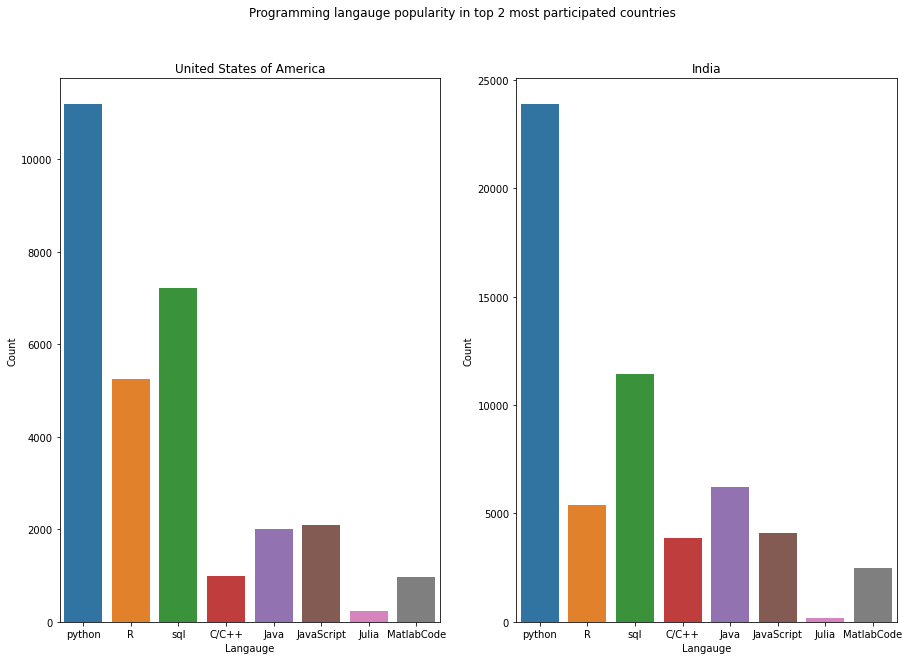

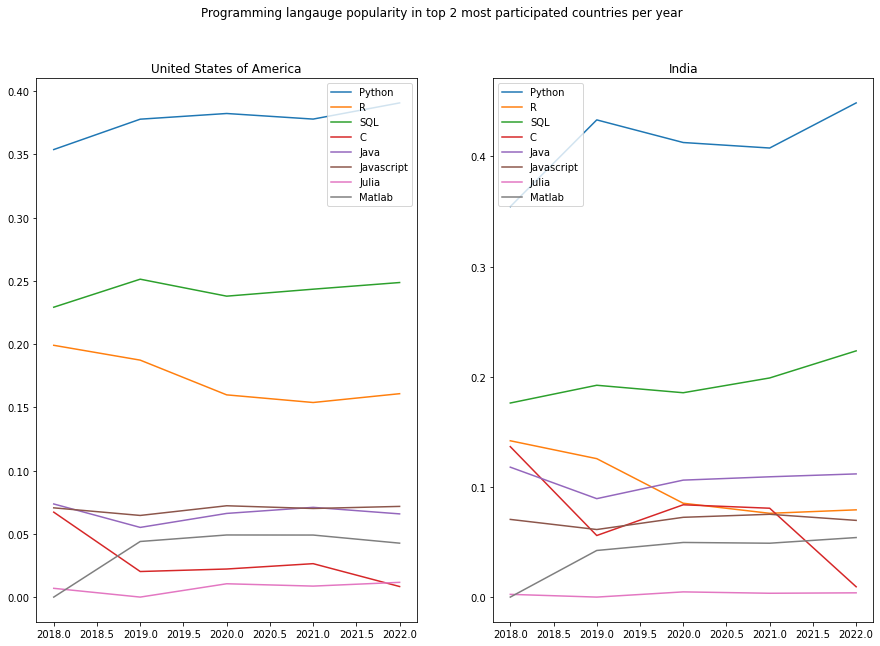

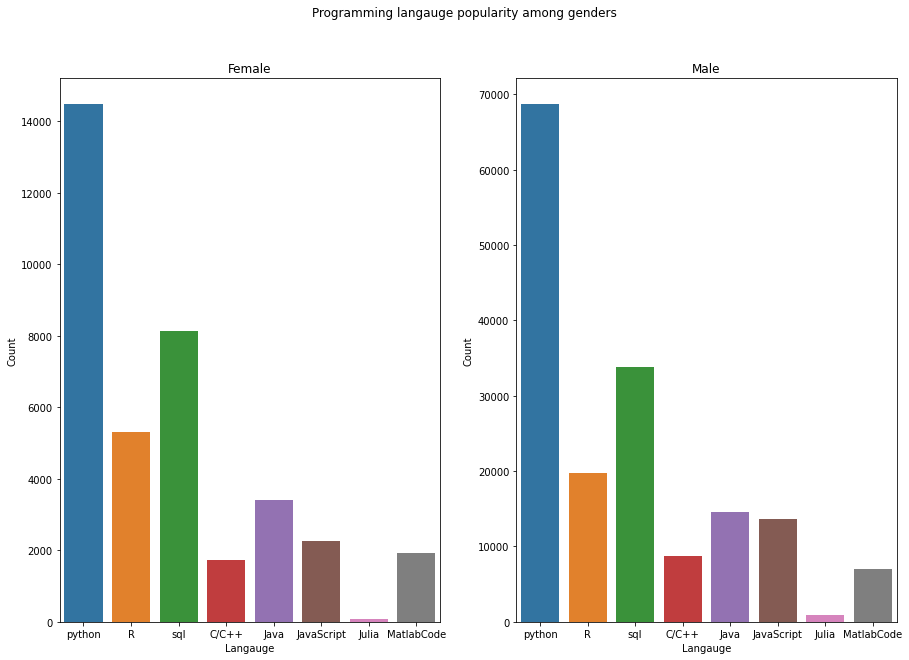

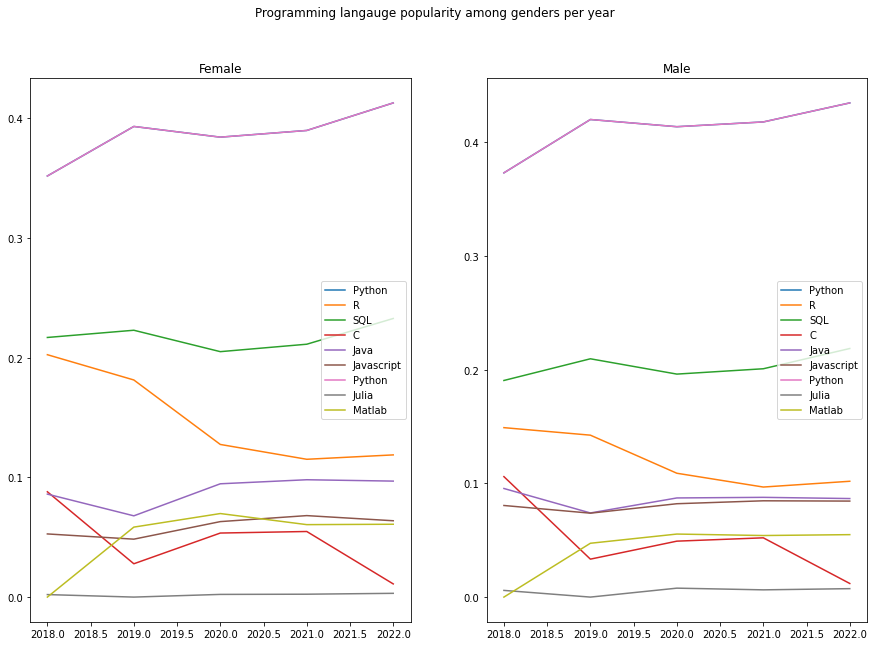

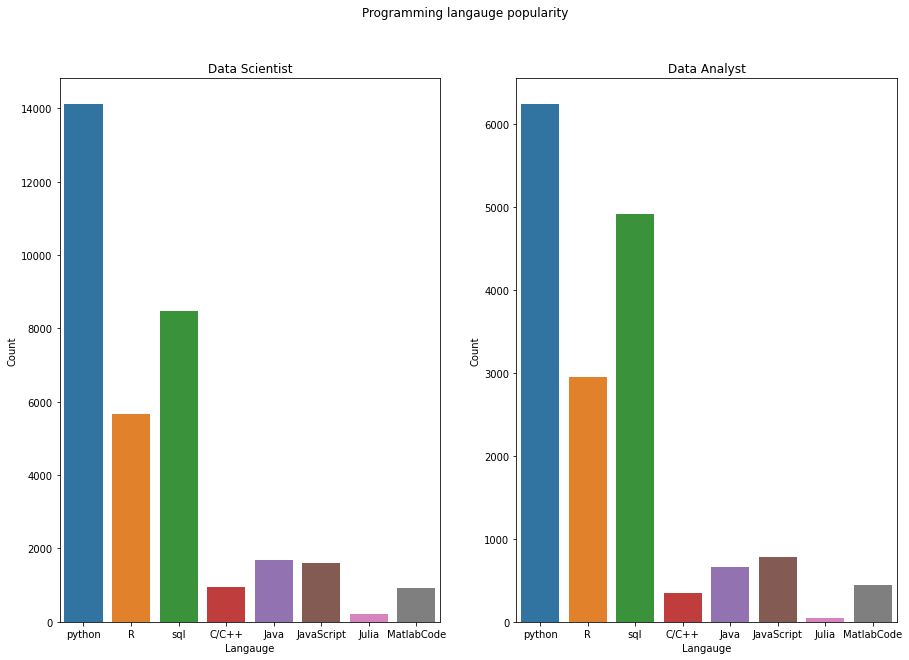

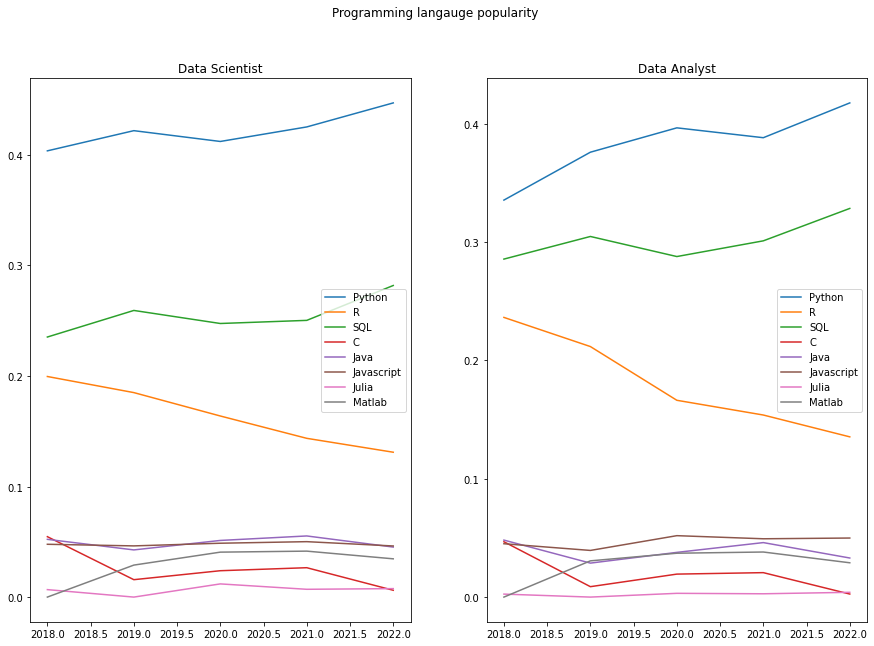

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


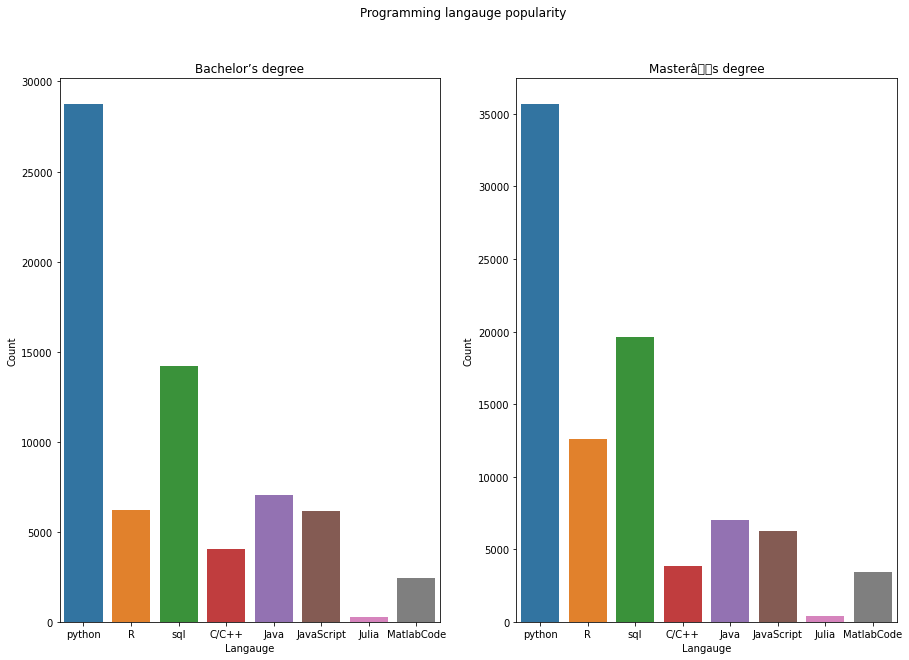

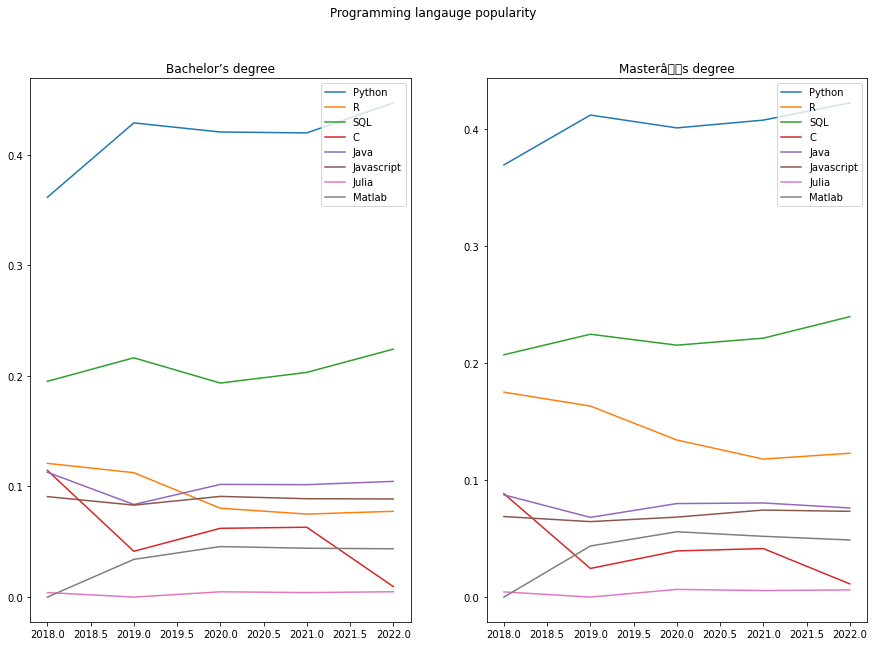

In [36]:
PL(data)
YPL(data)

MFPL(data_gen)
MFYPL(data_gen)

TPL(data_title)
TYPL(data_title)

EPL(data_education)
EYPL(data_education)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1648: UserWarning: Glyph 128 (\x80) missing from current font.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1648: UserWarning: Glyph 153 (\x99) missing from current font.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1913: UserWarning: Glyph 128 (\x80) missing from current font.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1913: UserWarning: Glyph 153 (\x99) missing from current font.


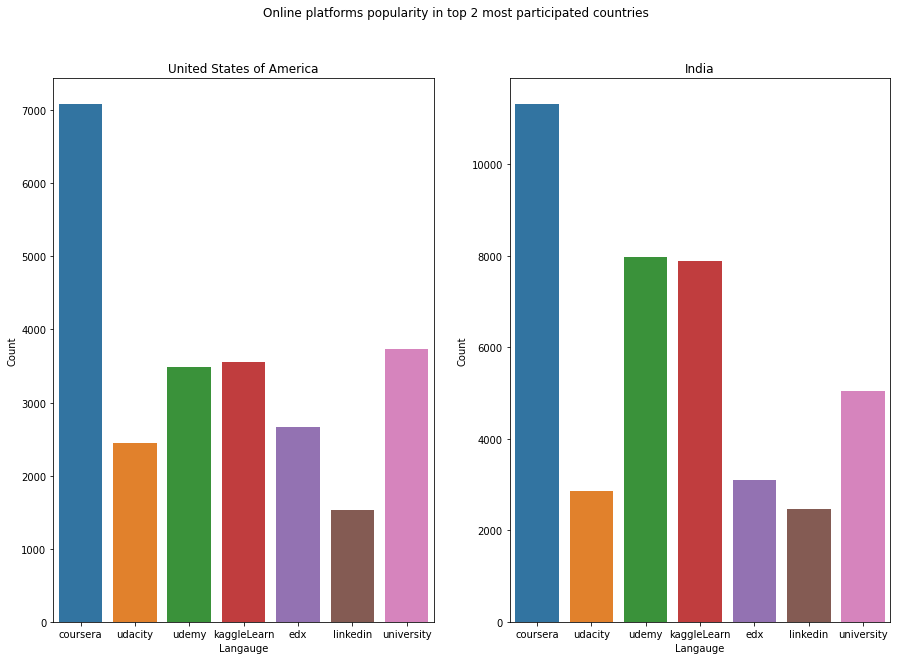

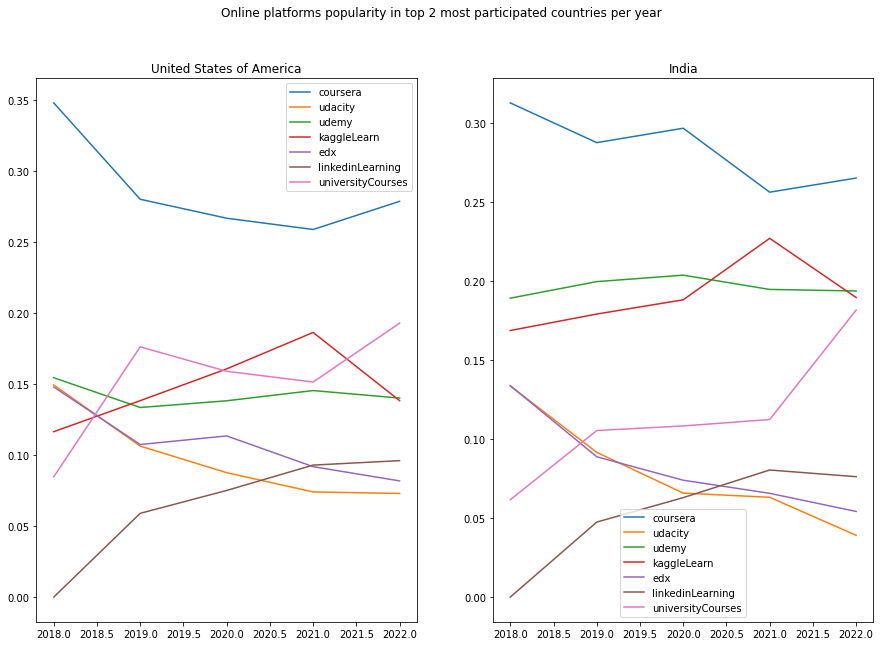

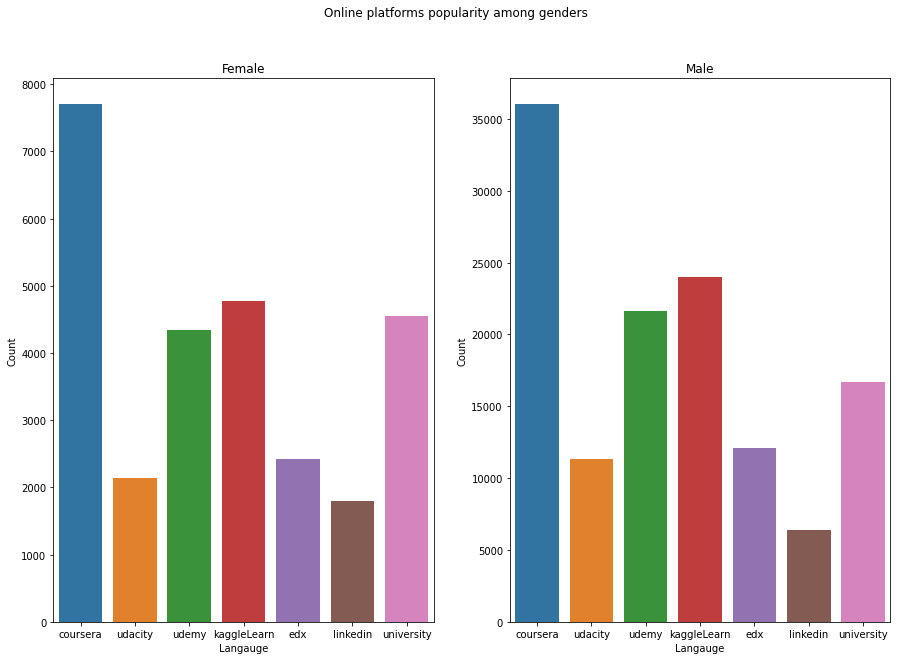

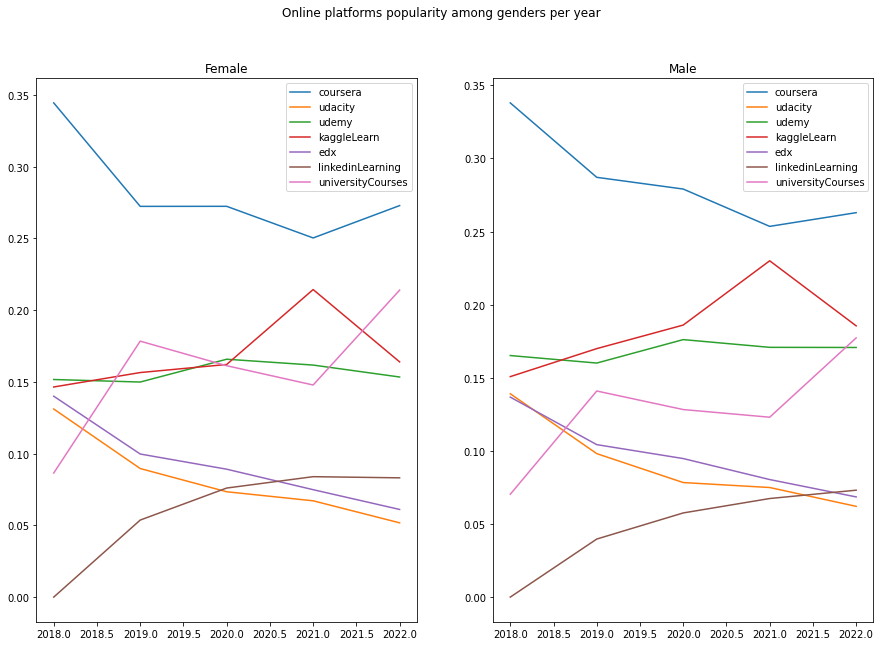

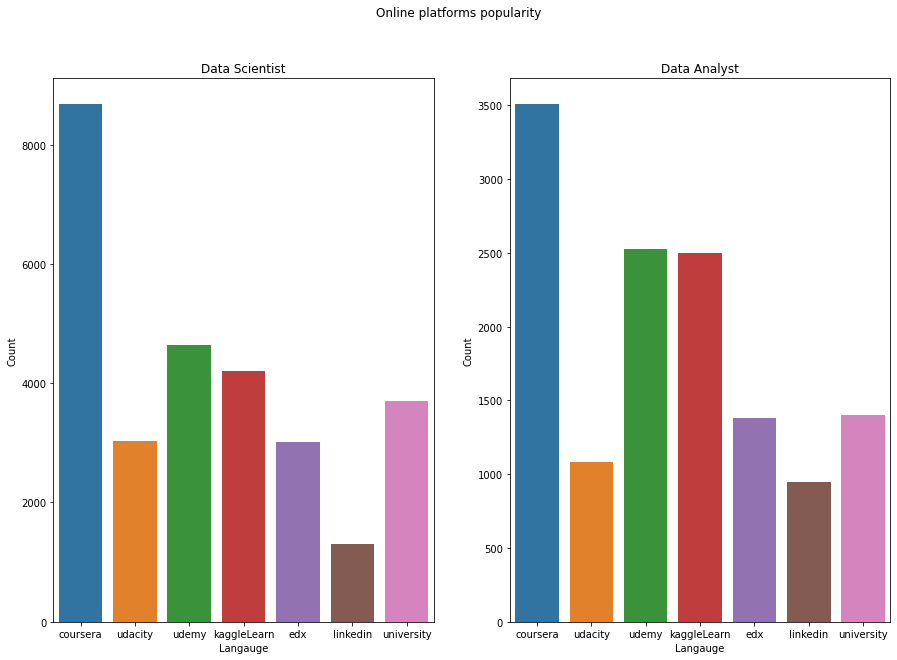

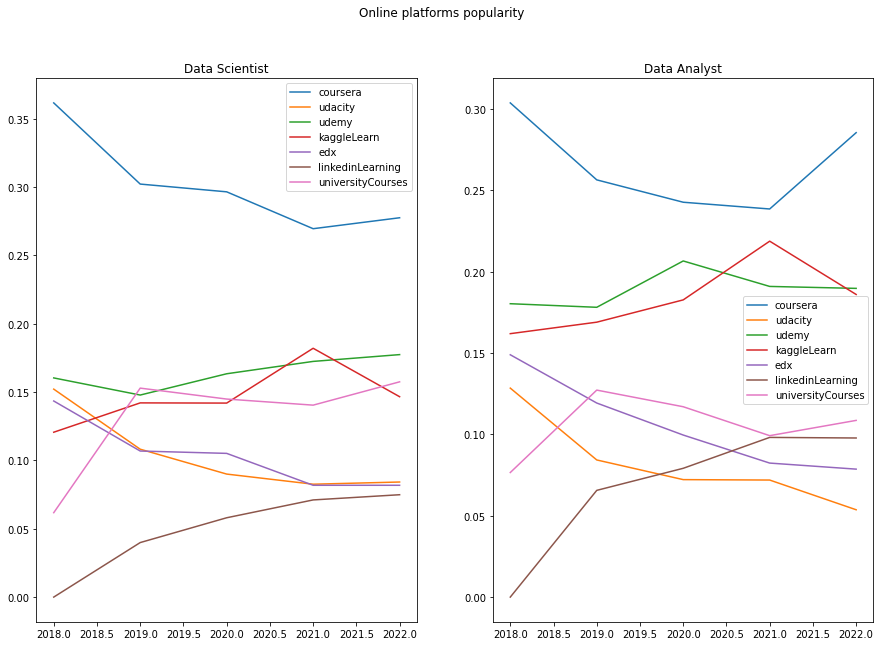

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


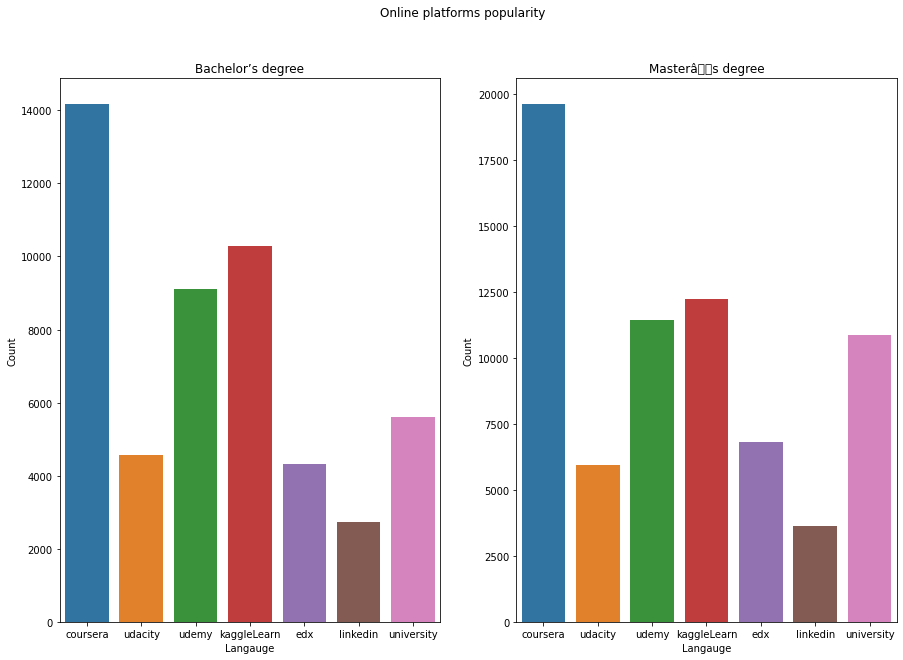

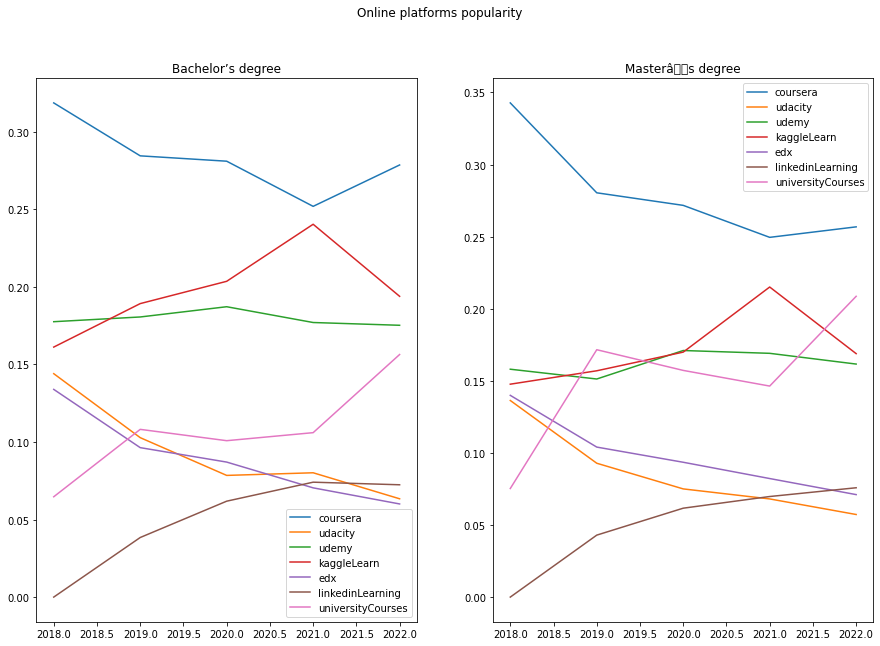

In [52]:
OP(data)
YOP(data)

MFOP(data_gen)
MFYOP(data_gen)

TOP(data_title)
TYOP(data_title)

EOP(data_education)
EYOP(data_education)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1625: UserWarning: Glyph 128 (\x80) missing from current font.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1625: UserWarning: Glyph 153 (\x99) missing from current font.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1850: UserWarning: Glyph 128 (\x80) missing from current font.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1850: UserWarning: Glyph 153 (\x99) missing from current font.


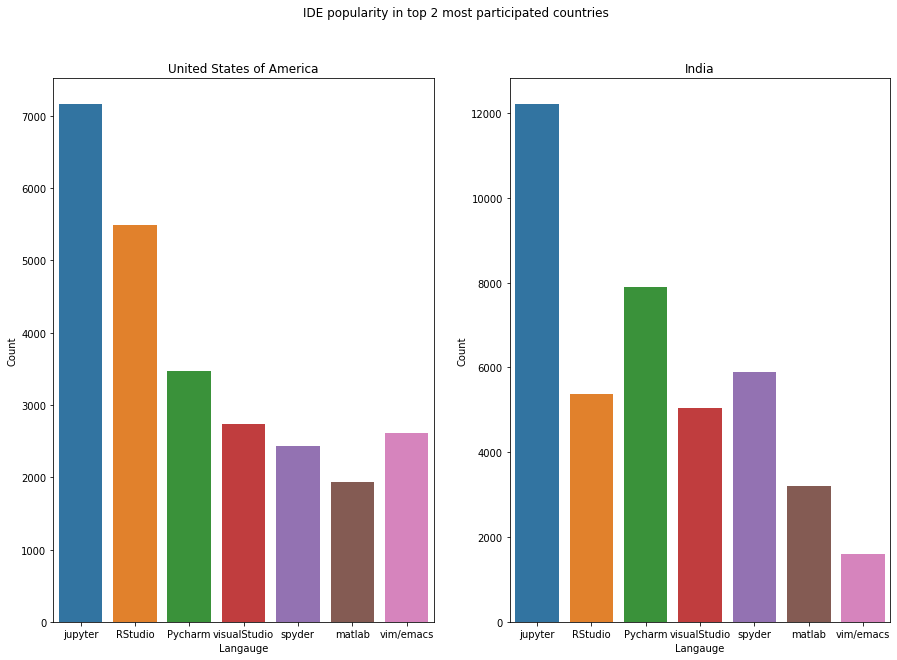

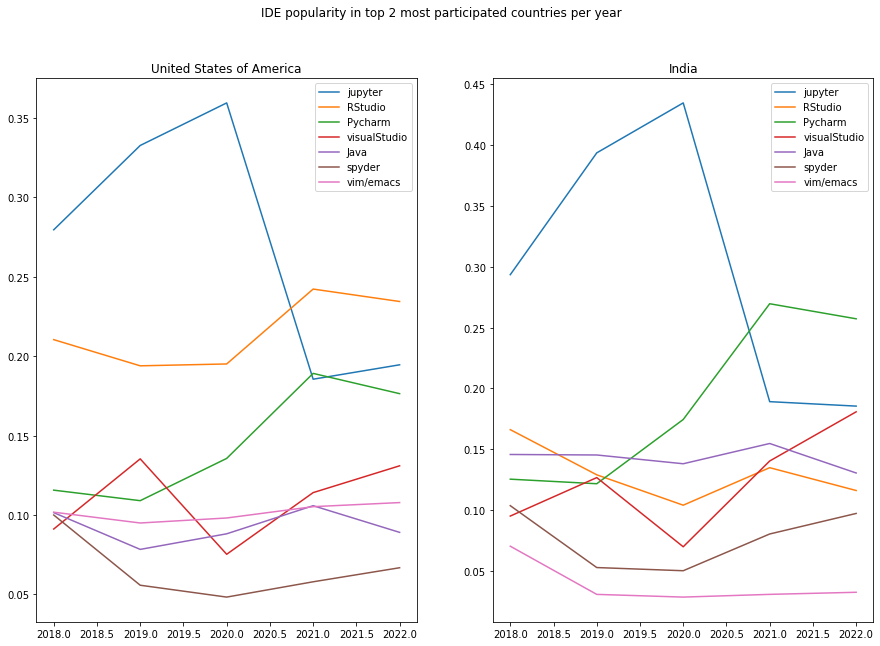

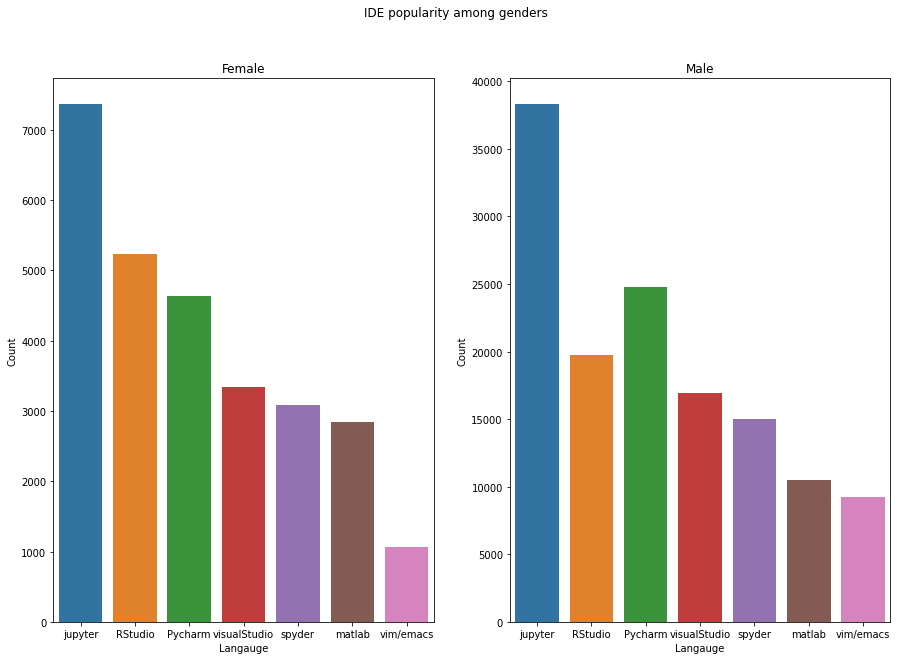

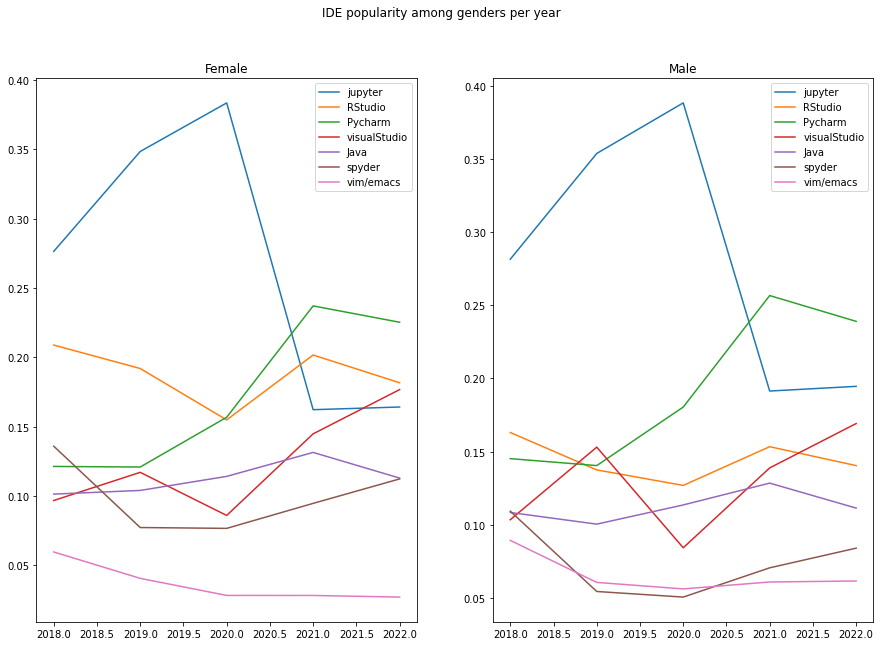

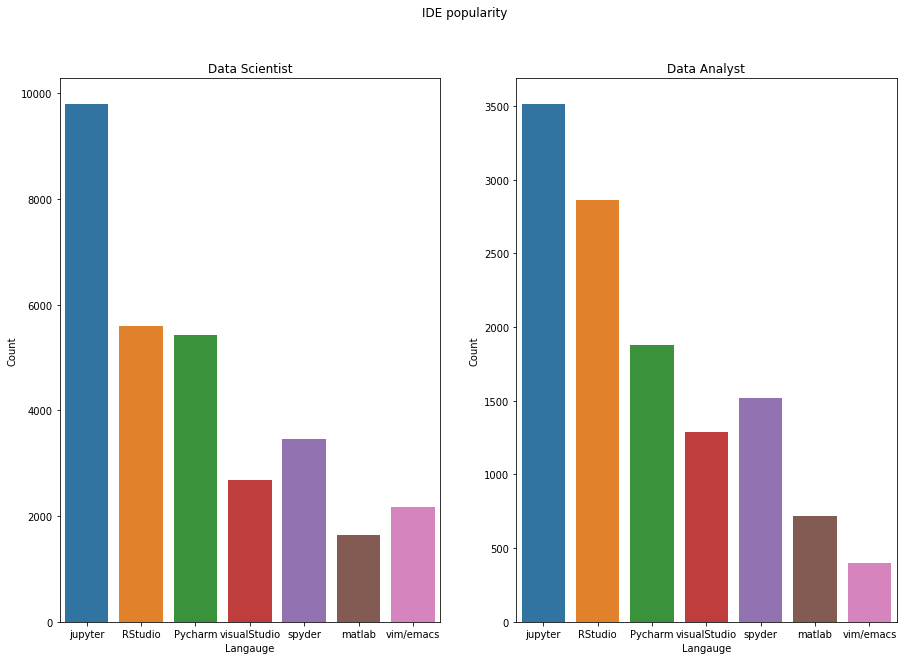

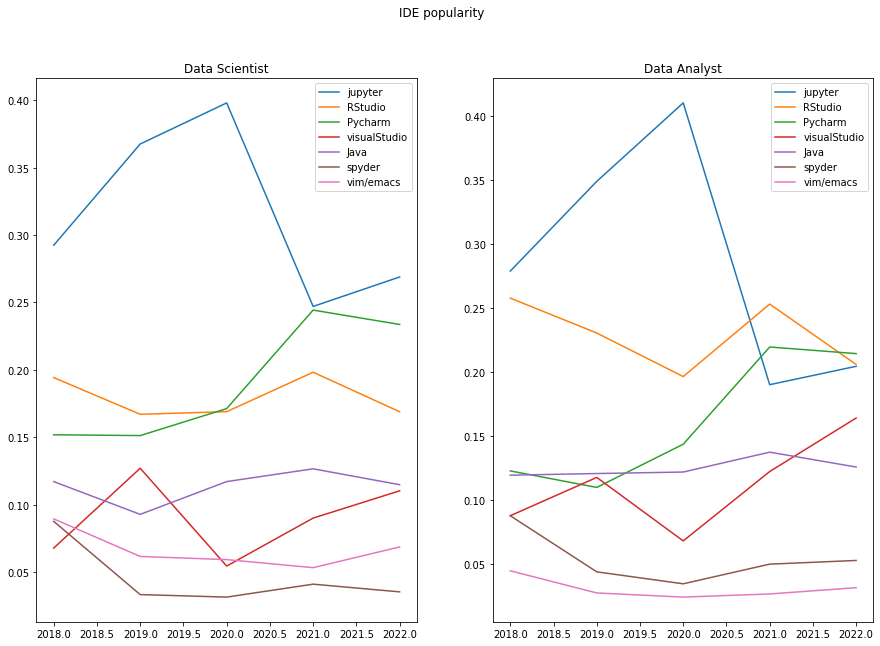

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


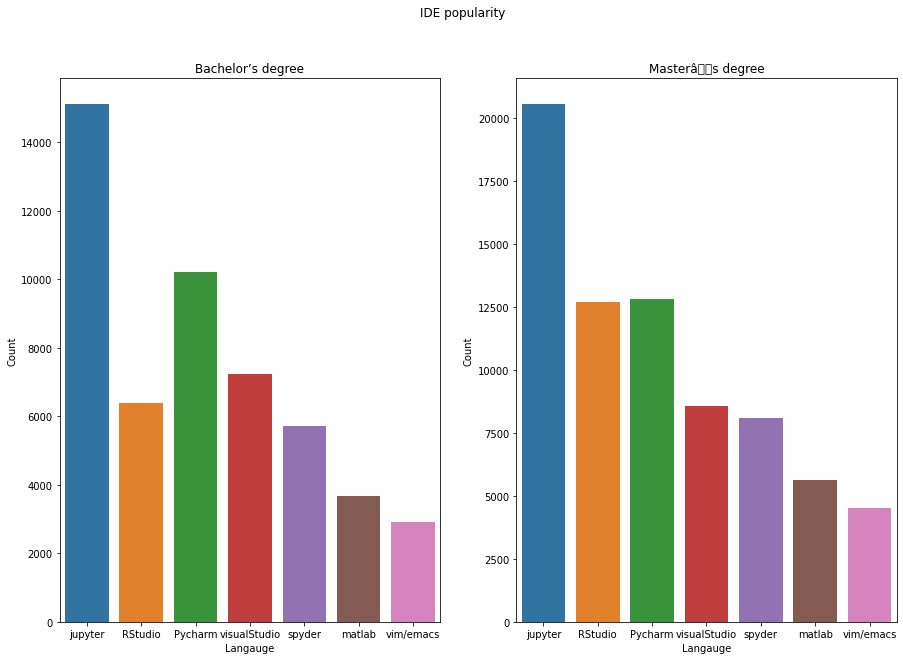

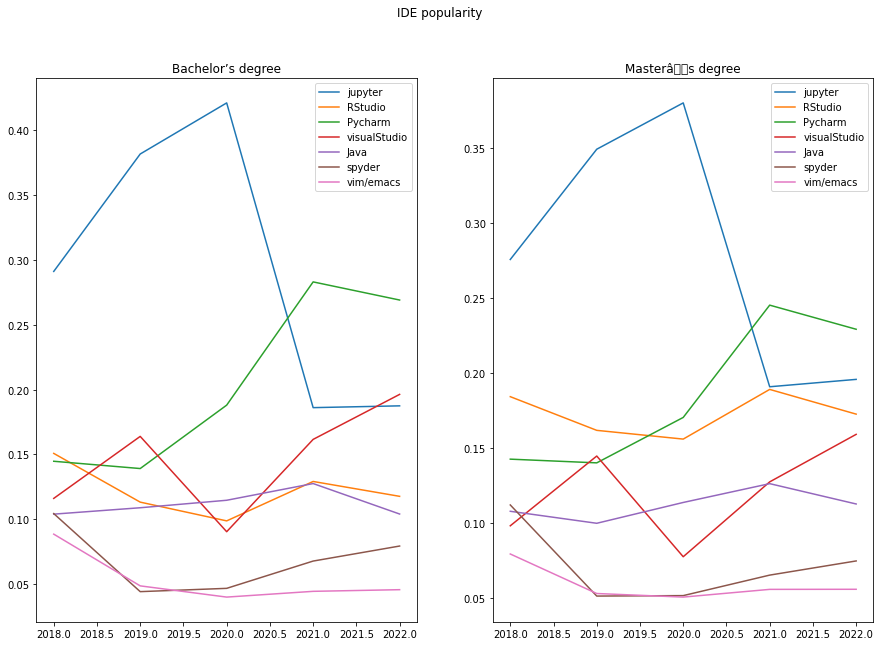

In [53]:
IDE(data)
YIDE(data)

MFIDE(data_gen)
MFYIDE(data_gen)

TIDE(data_title)
TYIDE(data_title)

EIDE(data_education)
EYIDE(data_education)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1671: UserWarning: Glyph 128 (\x80) missing from current font.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1671: UserWarning: Glyph 153 (\x99) missing from current font.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1962: UserWarning: Glyph 128 (\x80) missing from current font.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1962: UserWarning: Glyph 153 (\x99) missing from current font.


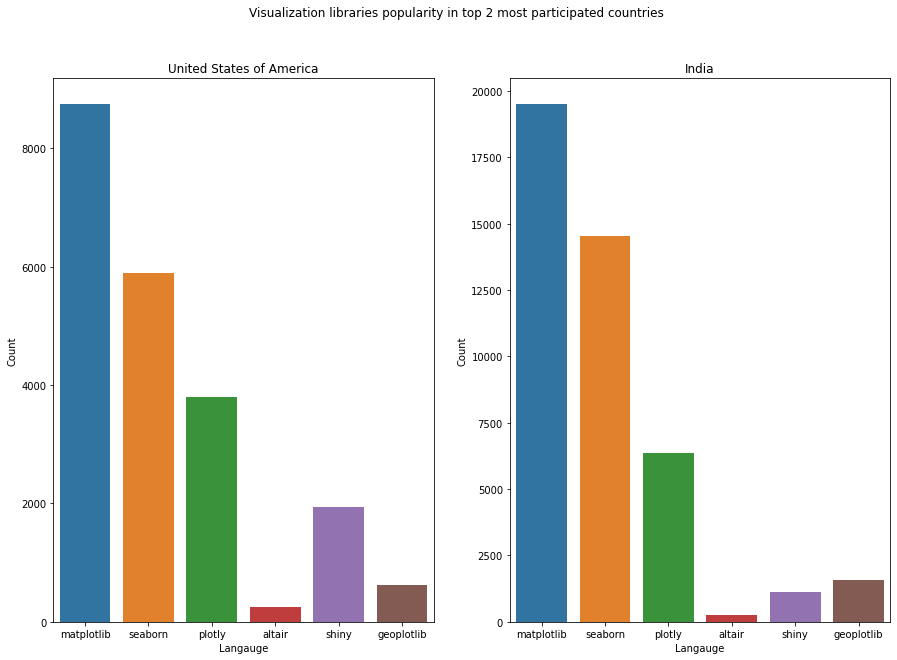

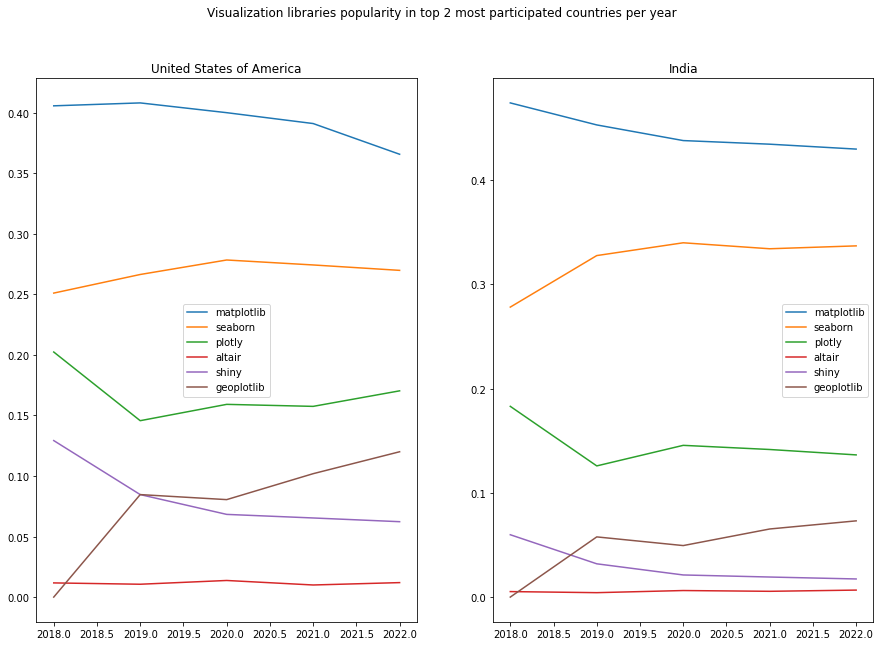

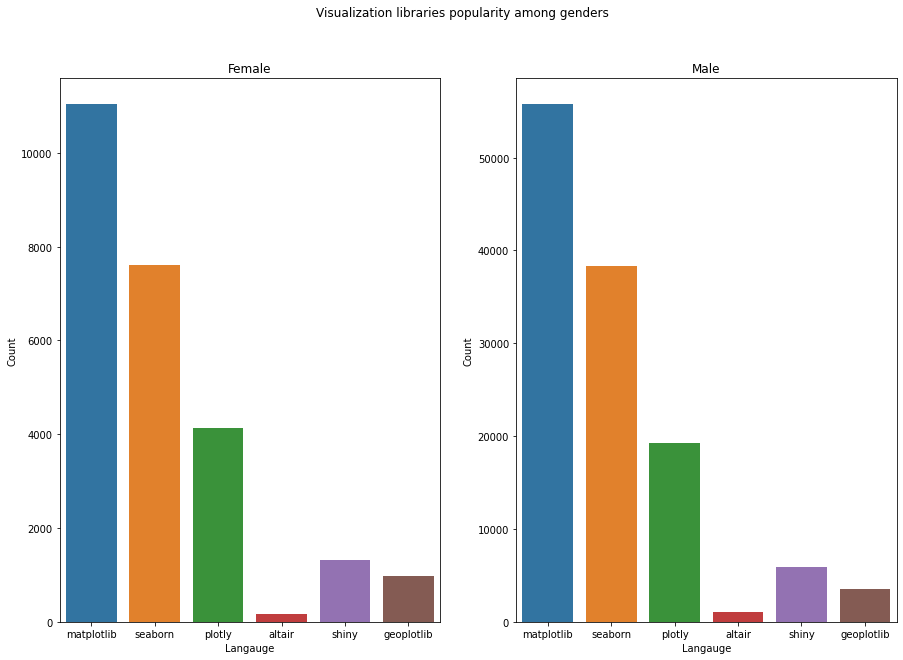

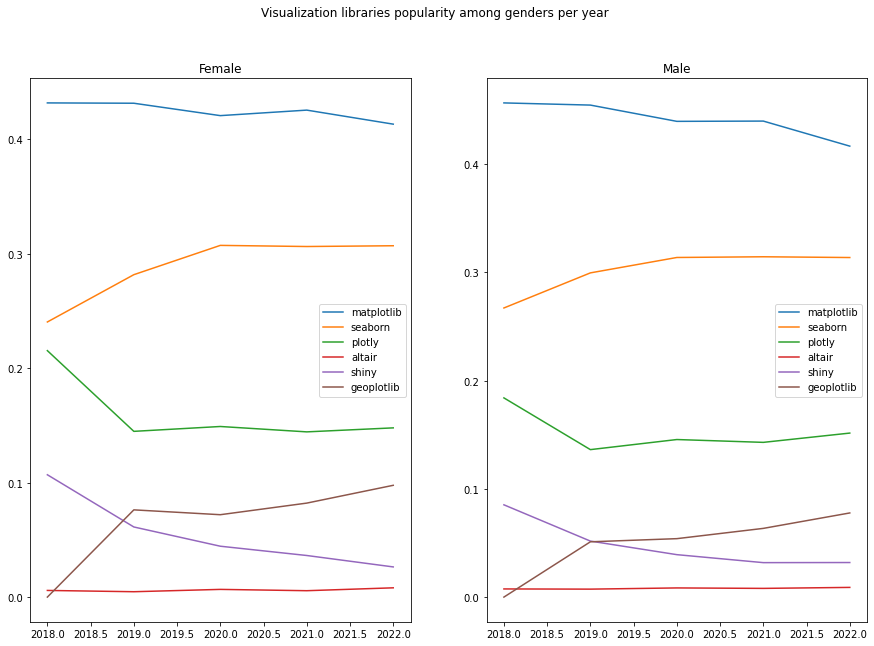

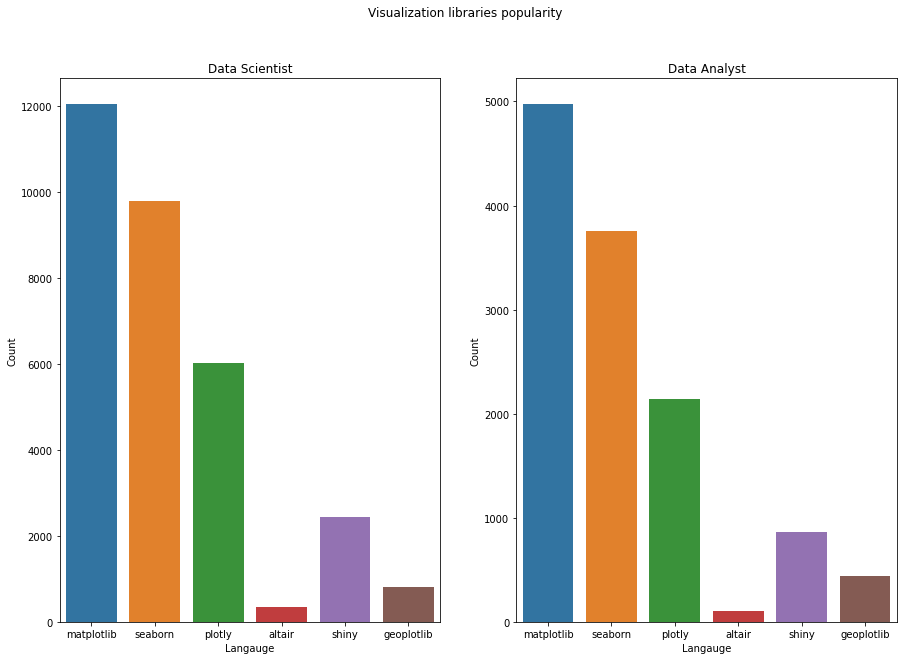

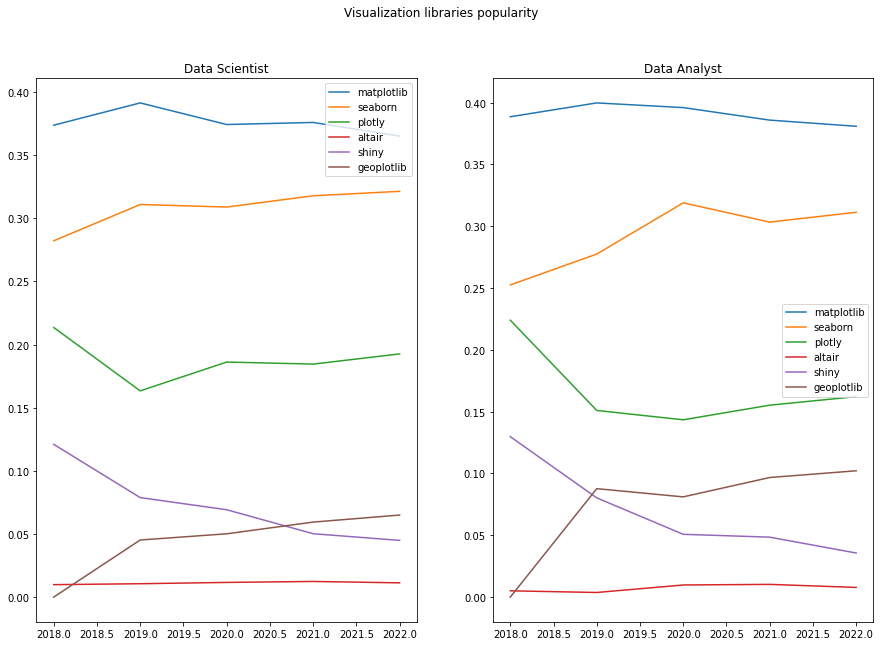

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


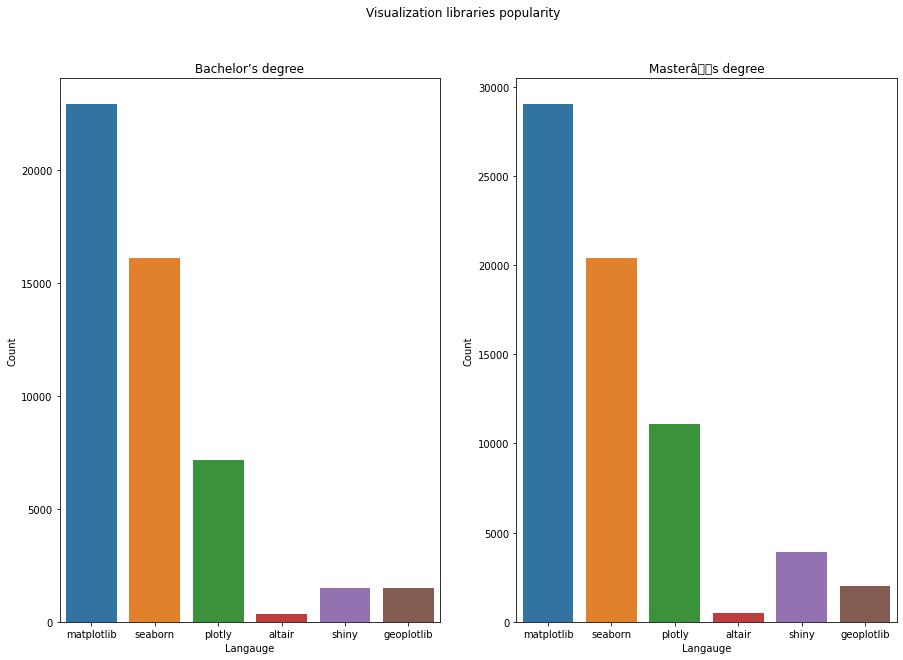

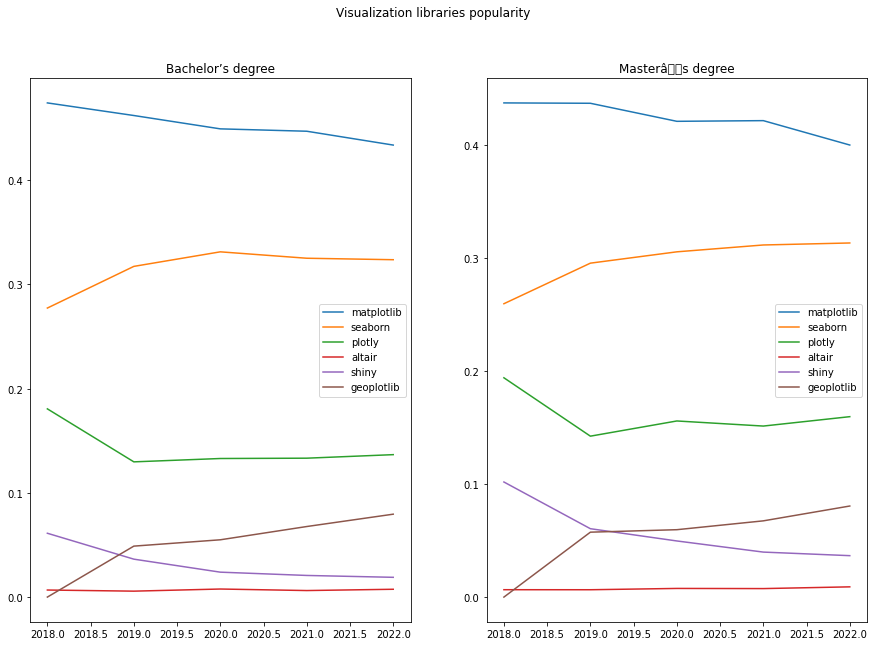

In [54]:
VP(data)
YVP(data)

MFVP(data_gen)
MFYVP(data_gen)

TVP(data_title)
TYVP(data_title)

EVP(data_education)
EYVP(data_education)





/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1693: UserWarning: Glyph 128 (\x80) missing from current font.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1693: UserWarning: Glyph 153 (\x99) missing from current font.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2021: UserWarning: Glyph 128 (\x80) missing from current font.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2021: UserWarning: Glyph 153 (\x99) missing from current font.


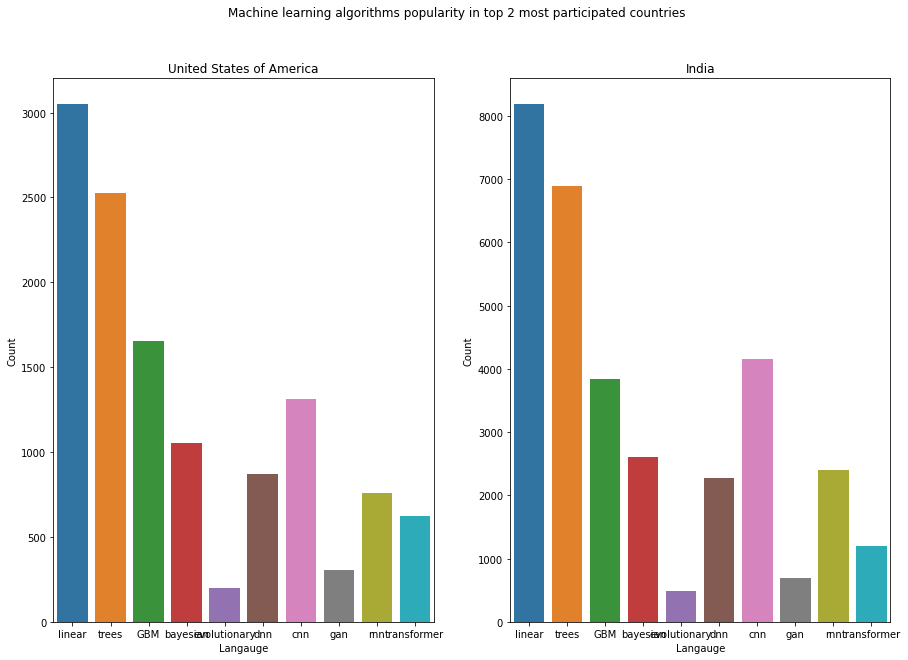

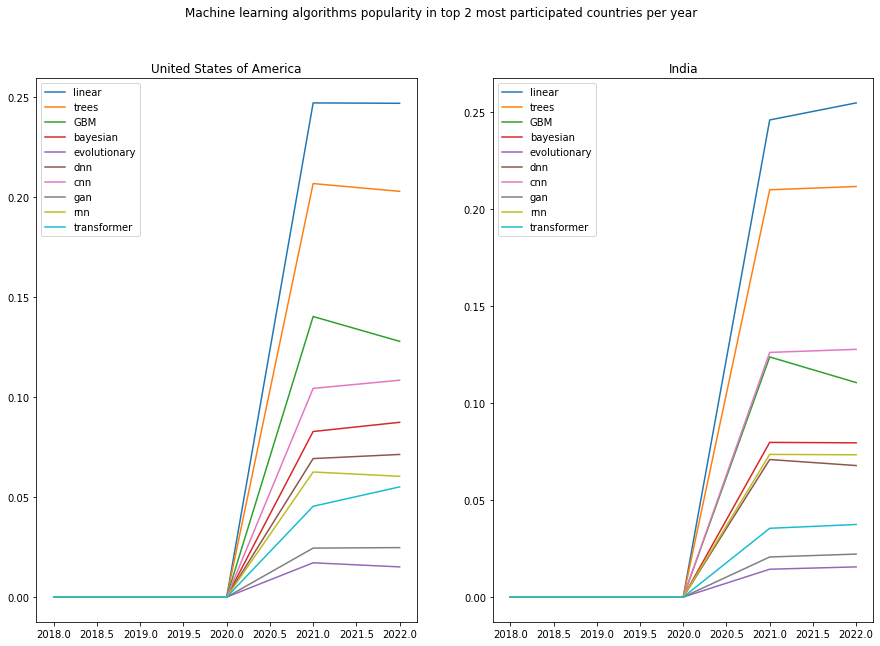

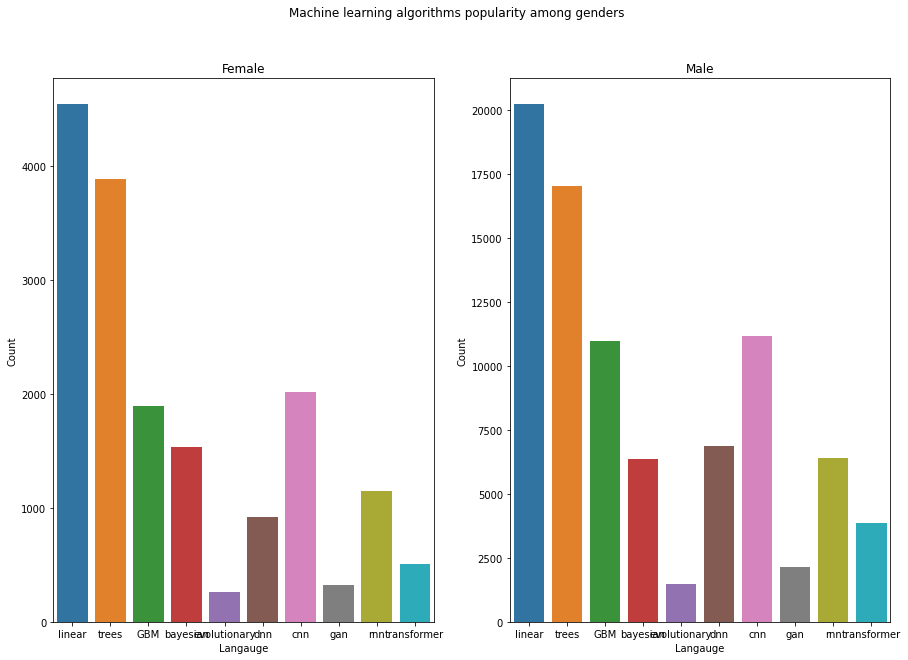

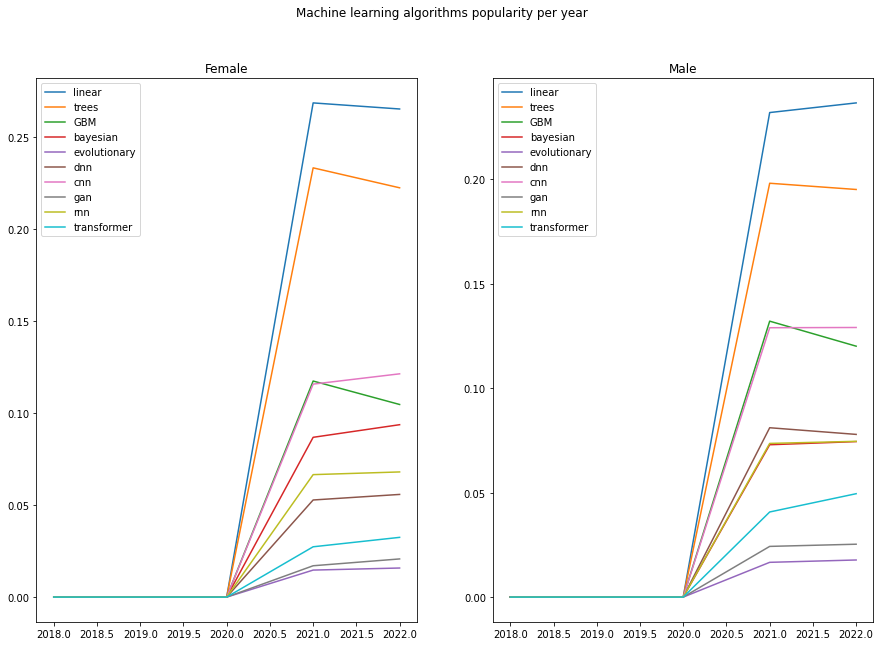

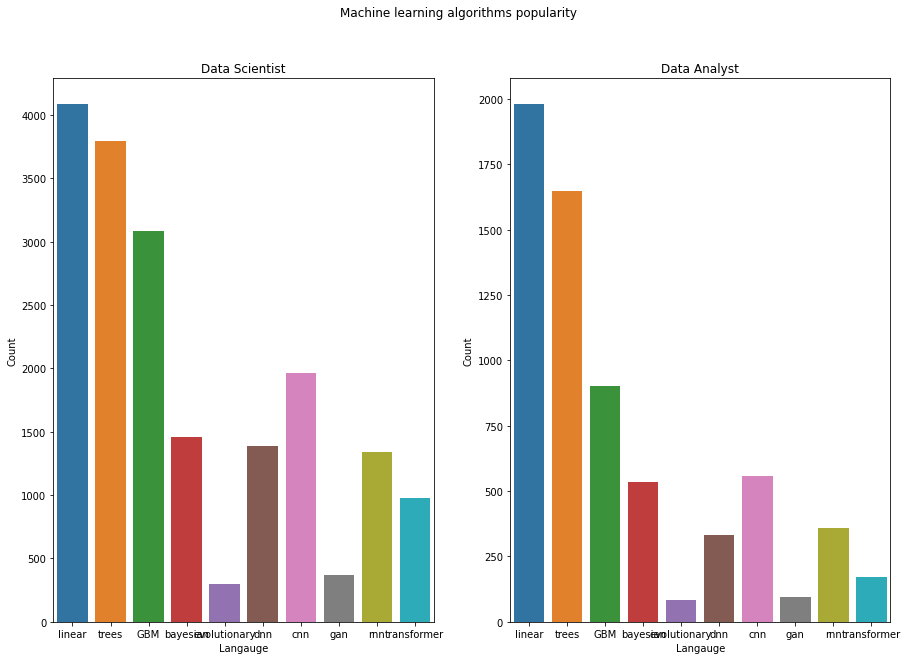

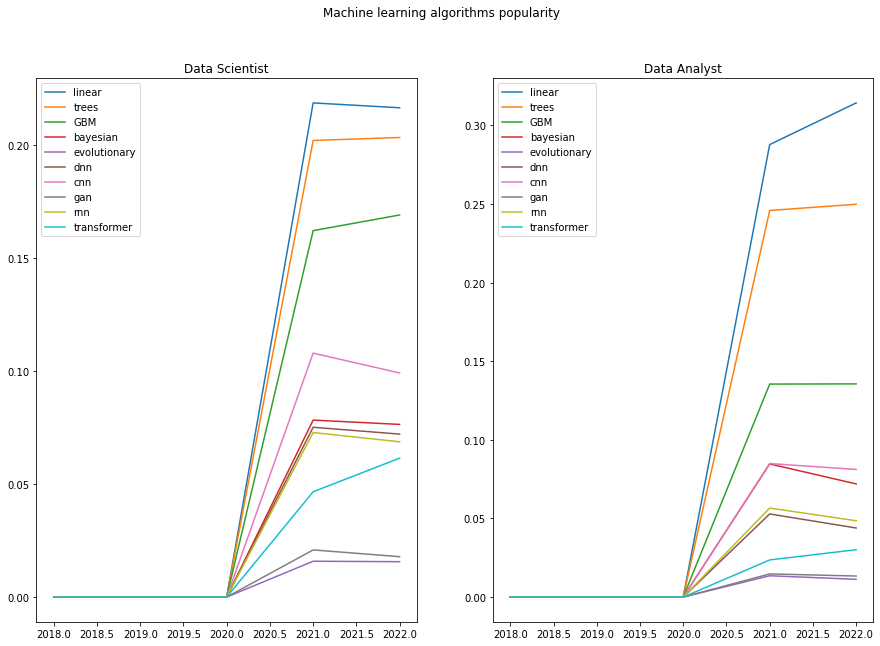

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


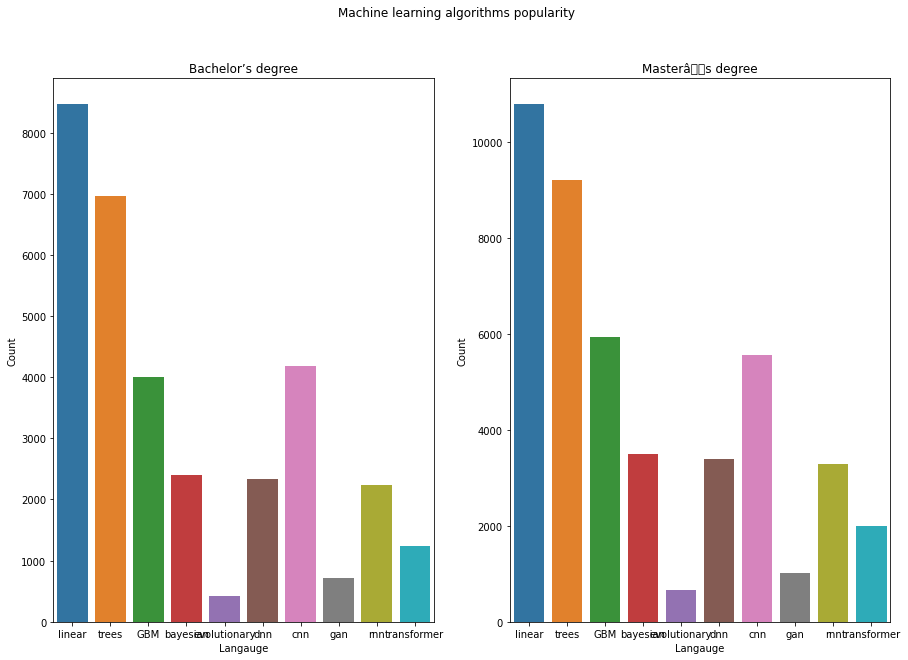

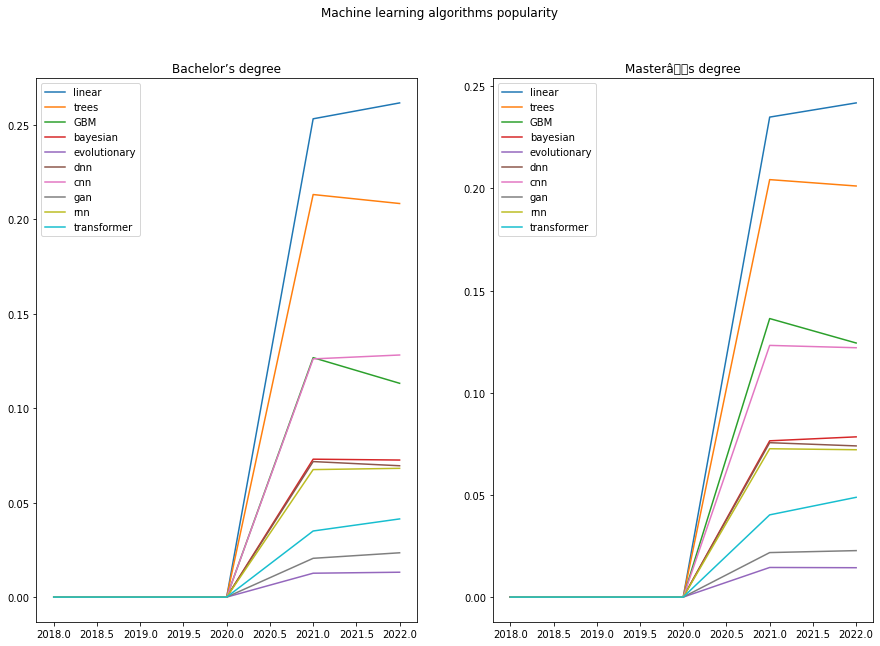

In [55]:
ML(data)
YML(data)

MFML(data_gen)
MFYML(data_gen)

TML(data_title)
TYML(data_title)

EML(data_education)
EYML(data_education)



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1715: UserWarning: Glyph 128 (\x80) missing from current font.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1715: UserWarning: Glyph 153 (\x99) missing from current font.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2070: UserWarning: Glyph 128 (\x80) missing from current font.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2070: UserWarning: Glyph 153 (\x99) missing from current font.


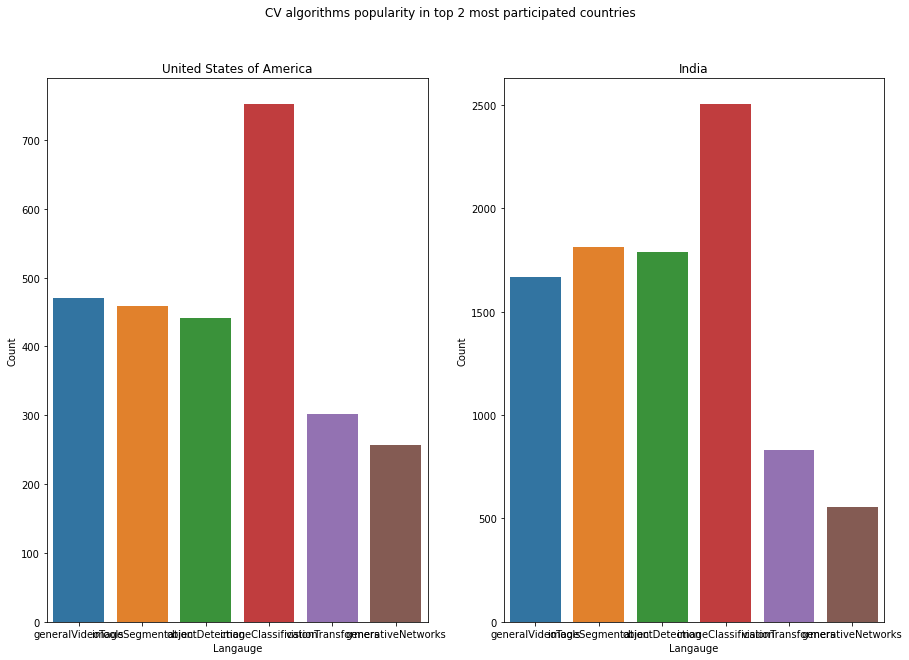

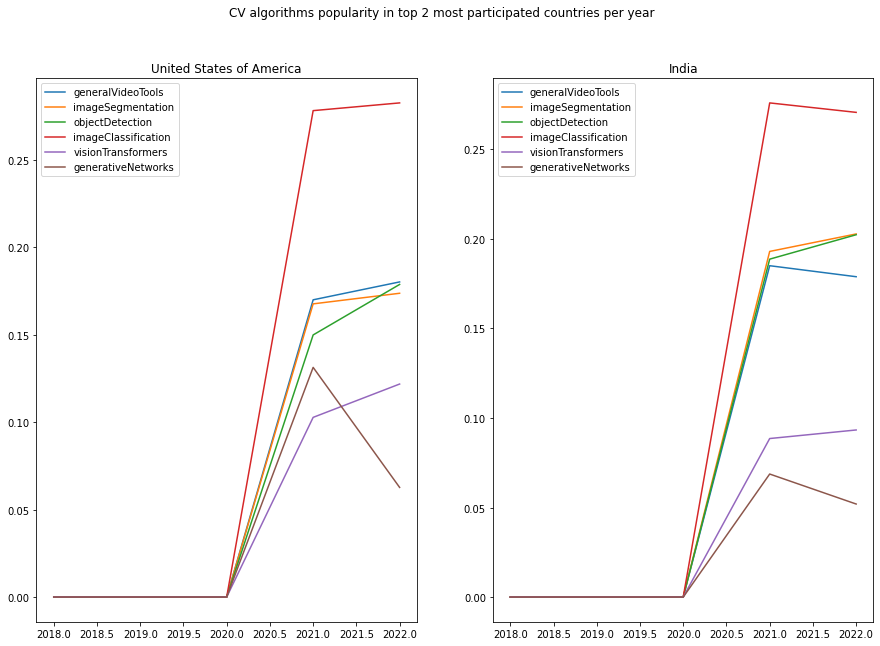

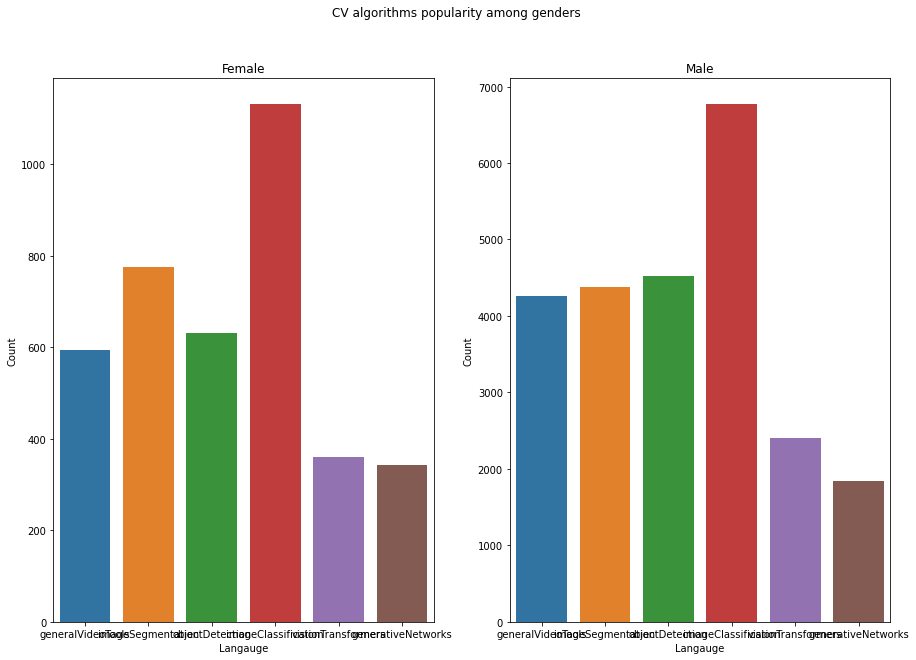

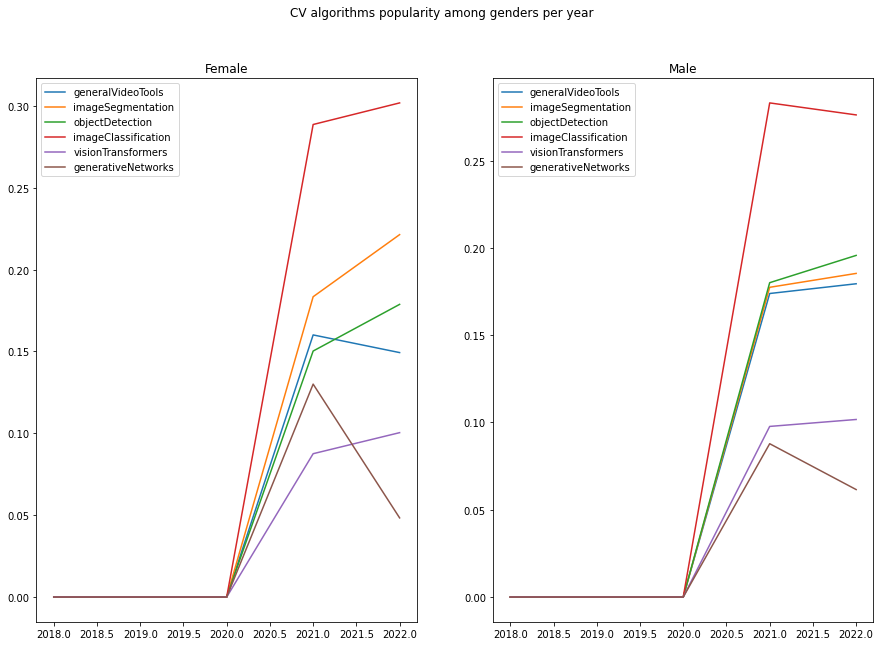

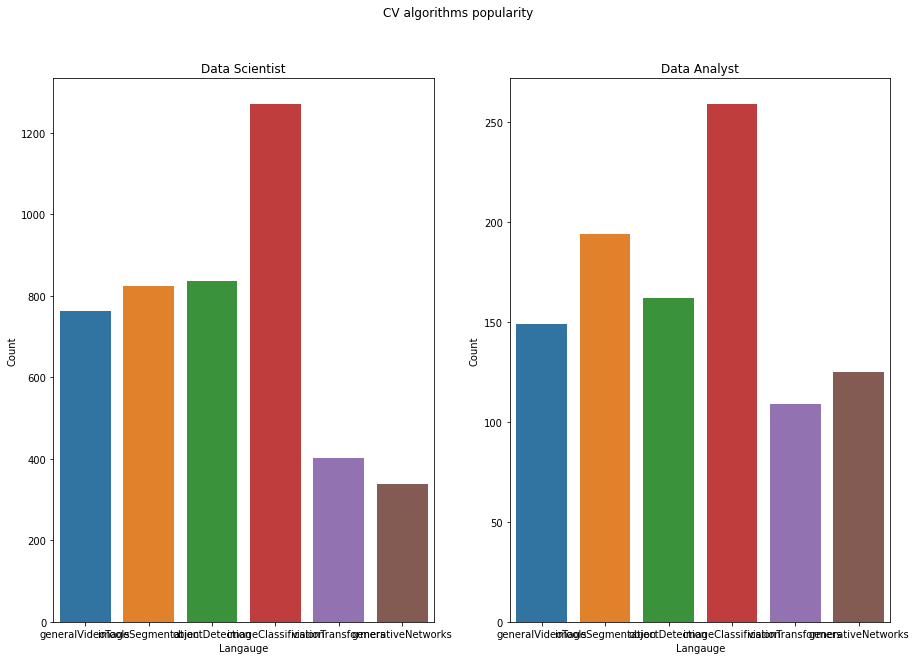

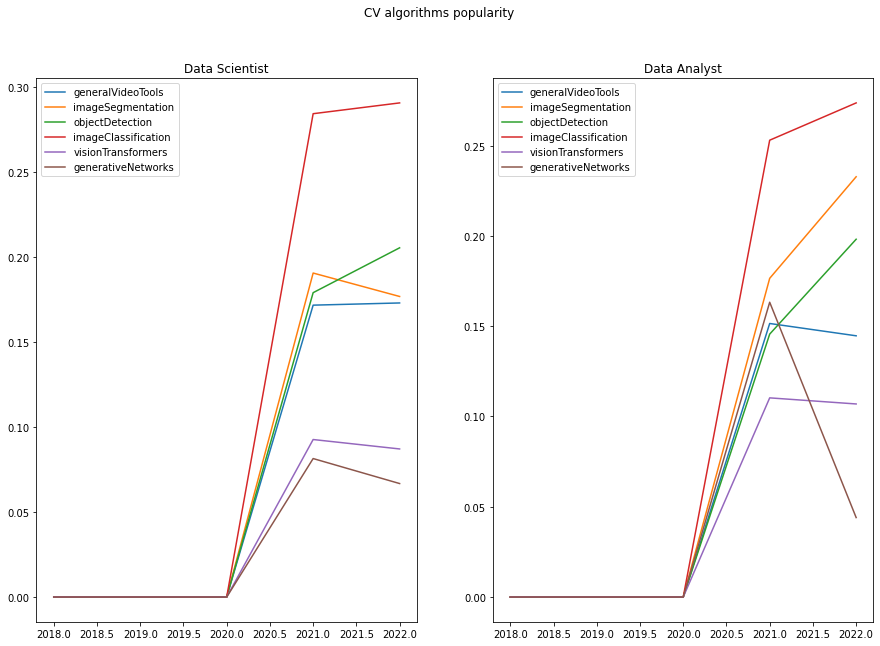

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


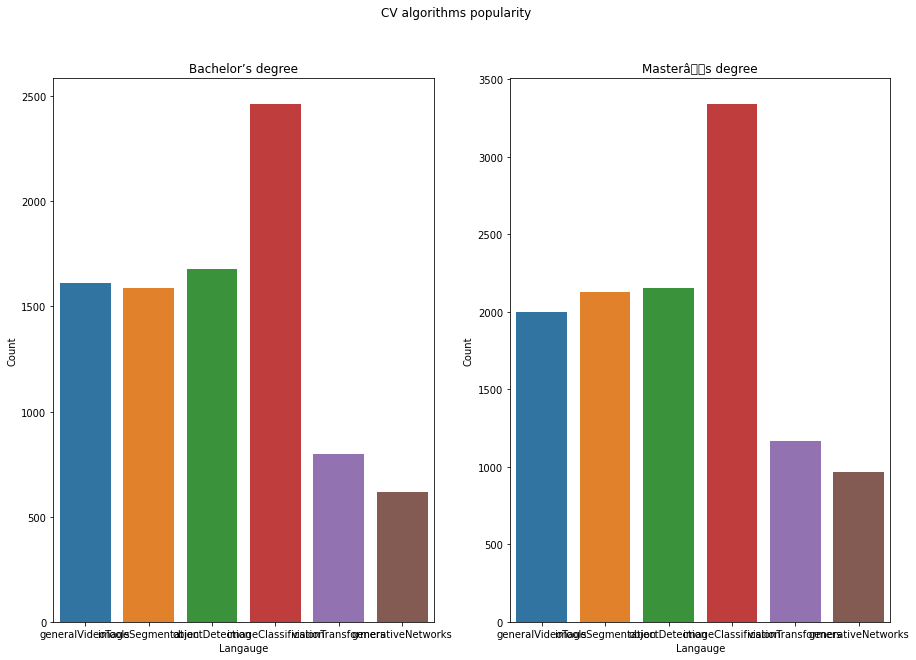

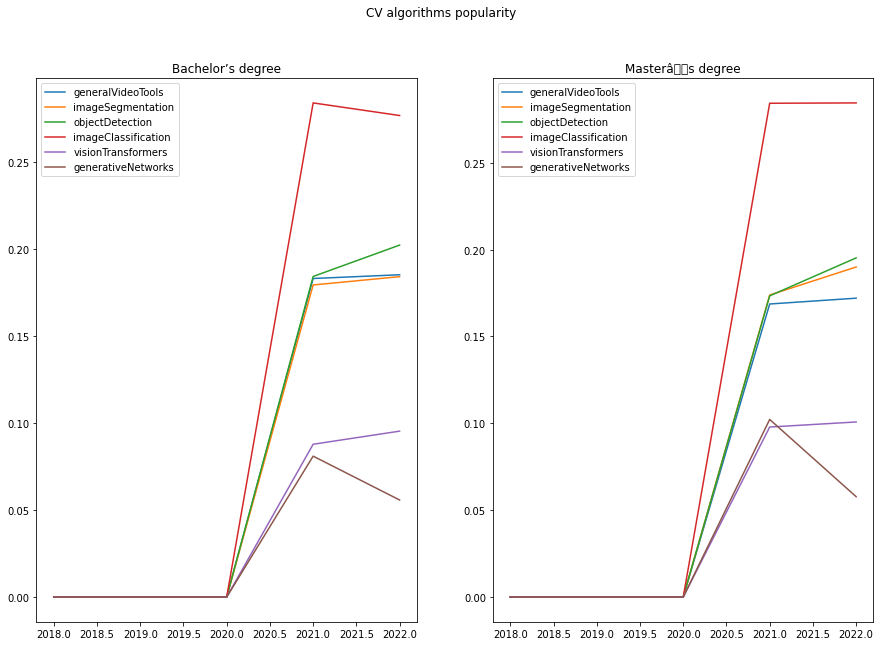

In [56]:
CV(data)
YCV(data)

MFCV(data_gen)
MFYCV(data_gen)

TCV(data_title)
TYCV(data_title)

ECV(data_education)
EYCV(data_education)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1737: UserWarning: Glyph 128 (\x80) missing from current font.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1737: UserWarning: Glyph 153 (\x99) missing from current font.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2115: UserWarning: Glyph 128 (\x80) missing from current font.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2115: UserWarning: Glyph 153 (\x99) missing from current font.


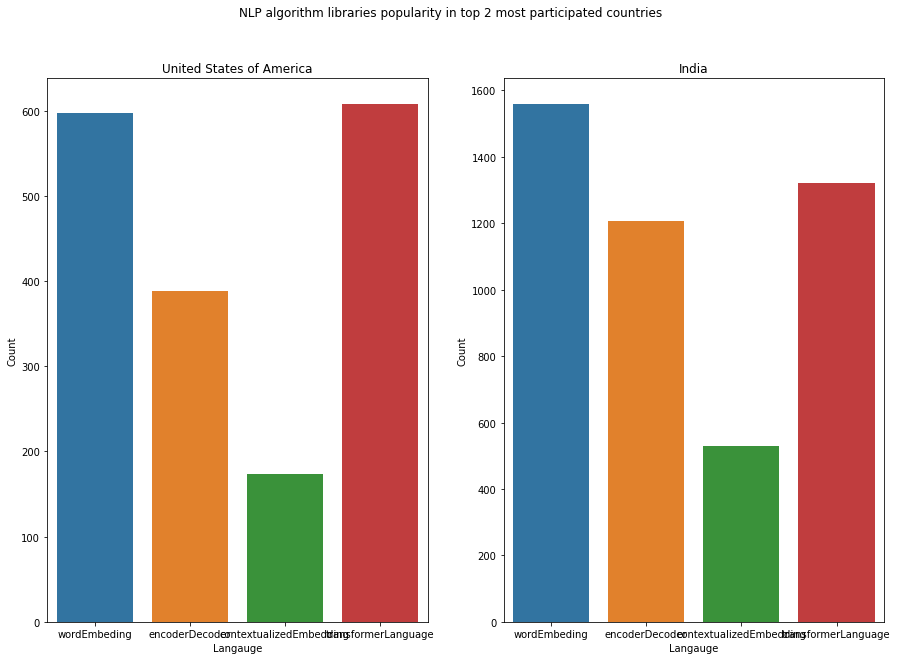

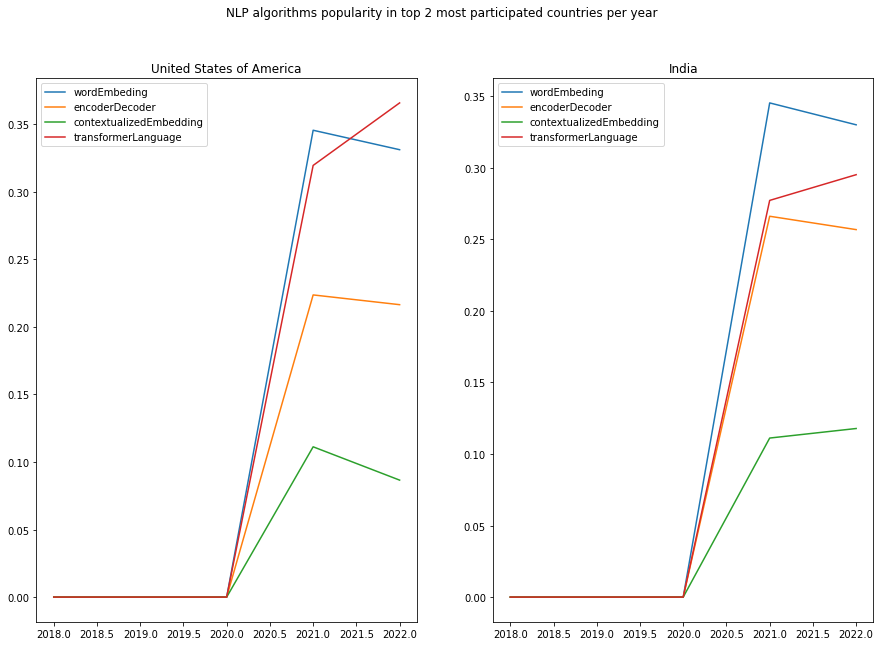

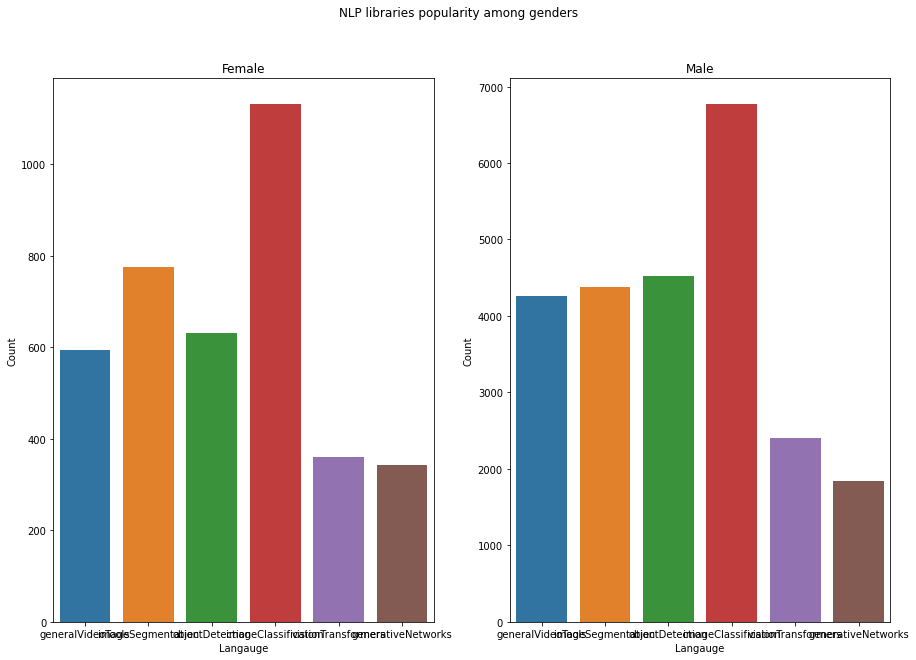

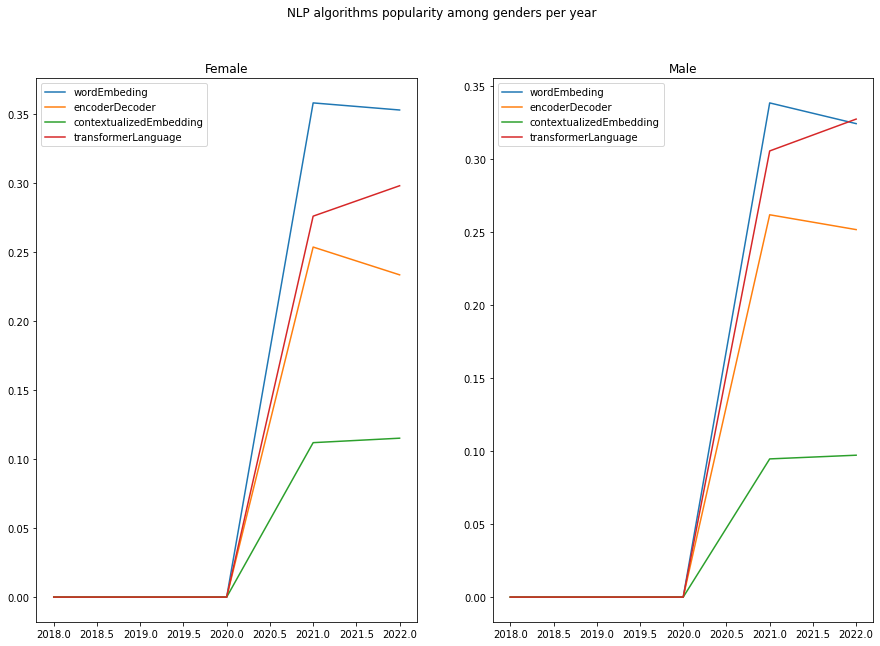

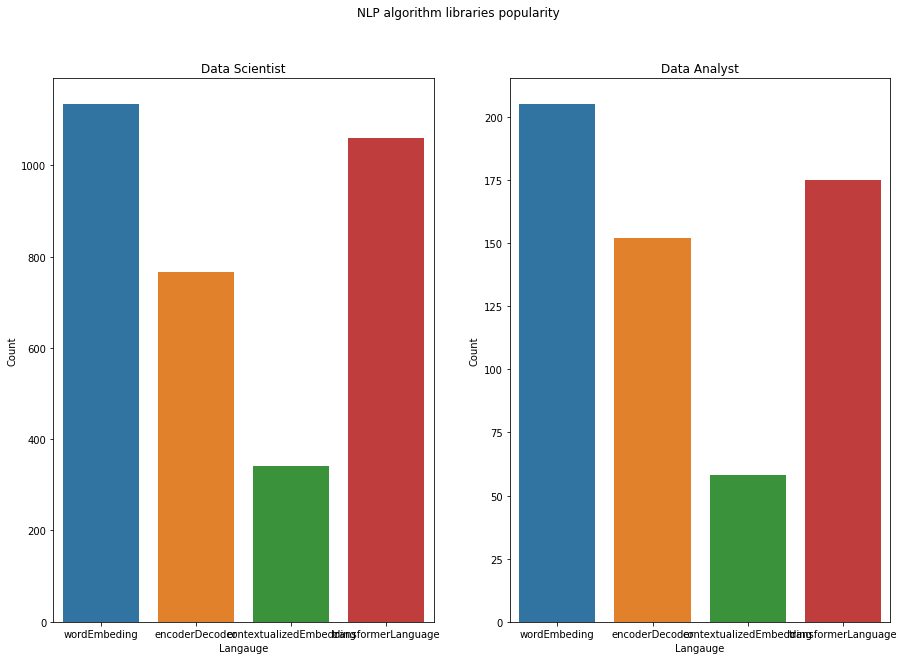

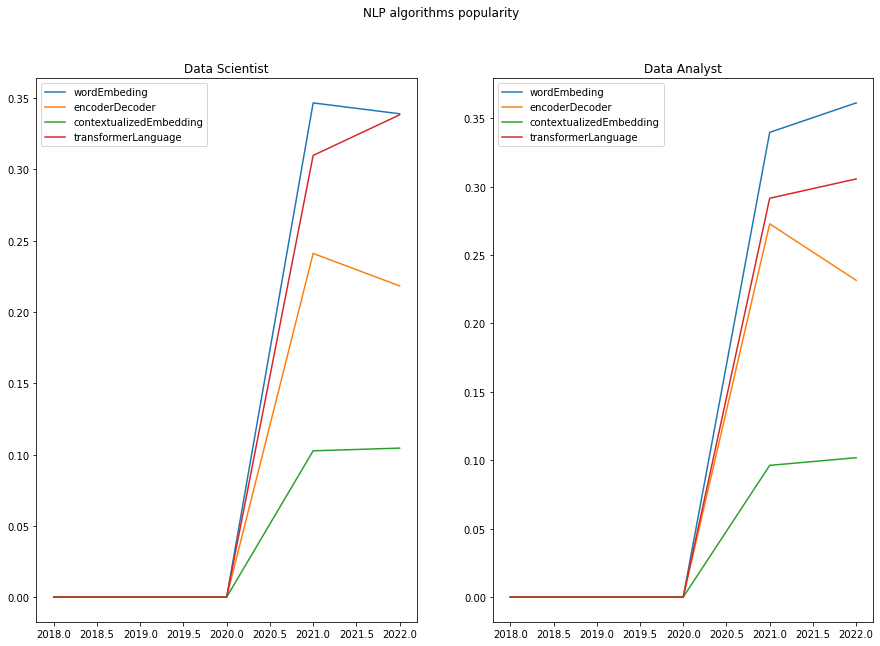

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


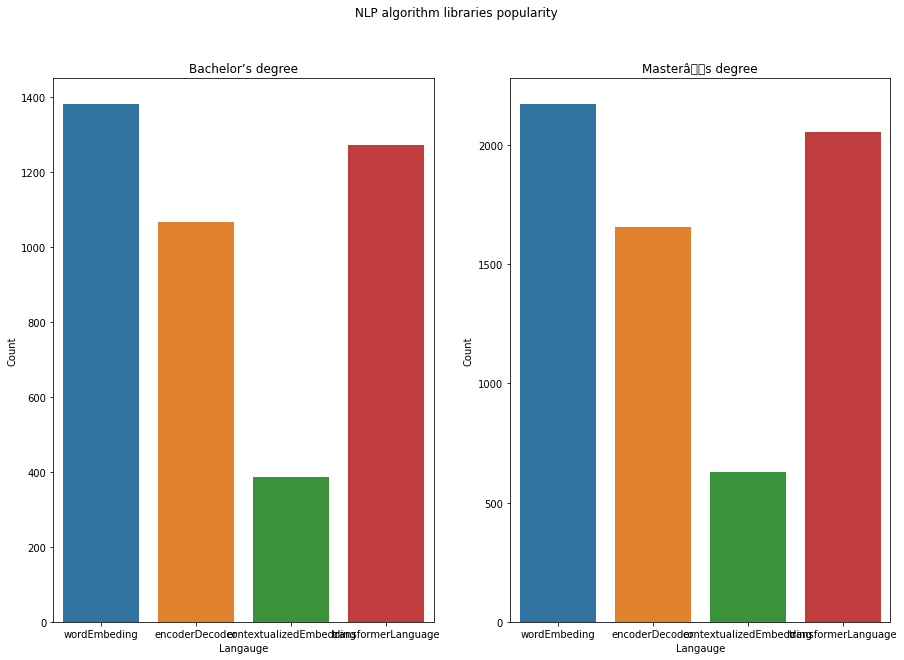

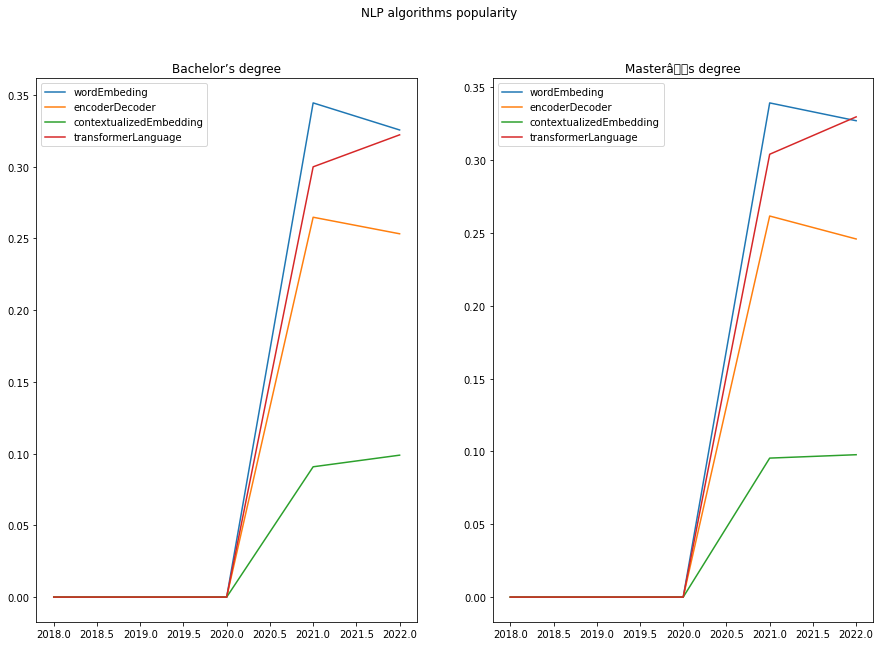

In [57]:
NLP(data)
YNLP(data)

MFNLP(data_gen)
MFYNLP(data_gen)

TNLP(data_title)
TYNLP(data_title)

ENLP(data_education)
EYNLP(data_education)
